# Marketing Campaign

## 0. About

A detailed analysis of the customers for a Grocery Store will be conducted. This will help the company better understand its customers and facilitate the process of modifying and updating its products based on the specific needs, behaviors, and concerns of each customer.

Customer personality analysis enables businesses to tailor their products to target customers within each segment. For example, rather than investing in the development of a new product for every individual in the database, the company could analyze which customer segment is most likely to purchase the product, and then focus on selling and promoting that product exclusively within that segment.

## 1. Objectives

Conduct a clustering analysis on the Marketing Campaign to simplify and summarize customer segments.

## 2. About the Dataset

#### Introduction to the Database

The dataset used for this analysis comes from a marketing campaign dataset available on [Kaggle](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign), which focuses on customer behavior and preferences. It provides rich demographic, behavioral, and transactional data that can be used to perform customer segmentation and target specific customer groups effectively.

The dataset contains 2,240 observations and 29 variables, capturing critical information about each customer’s demographics (age, income, education, and family composition), purchasing behavior (expenditure on various products such as wine, meat, and gold), and interaction with the company’s promotional campaigns. The data spans multiple aspects of customer activity, including online, catalog, and in-store purchases.

The primary goal of this dataset is to assist businesses in understanding their customer base, facilitating the development of personalized marketing strategies and more targeted product offerings. By leveraging this data, companies can tailor their promotional efforts and product development to the needs of specific customer segments, ultimately improving customer satisfaction and driving sales growth.

This dataset is particularly well-suited for performing clustering analysis, which can help simplify and summarize the diverse customer segments, enabling more focused and efficient marketing strategies.

This introduction provides context about the dataset’s content, its purpose, and its relevance to clustering analysis for market segmentation. Let me know if you’d like to expand on any part of this.

#### Attributes of the Database

Since this is a market research problem, we will analyze customer-related attributes, followed by three of the four P’s of Marketing (Place, Promotion, and Product), excluding price.

##### Customer Attributes
- **ID**: Unique identifier for each customer
- **Year_Birth**: Year of birth of the customer
- **Education**: Education level of the customer
- **Marital_Status**: Marital status of the customer
- **Income**: Annual household income of the customer
- **Kidhome**: Number of children in the customer's household
- **Teenhome**: Number of teenagers in the customer's household
- **Dt_Customer**: Date when the customer enrolled with the company
- **Recency**: Number of days since the customer's last purchase
- **Complain**: 1 if the customer has complained in the last two years, 0 otherwise

##### Product Attributes
- **MntWines**: Amount spent on wine in the last two years
- **MntFruits**: Amount spent on fruits in the last two years
- **MntMeatProducts**: Amount spent on meat in the last two years
- **MntFishProducts**: Amount spent on fish in the last two years
- **MntSweetProducts**: Amount spent on sweets in the last two years
- **MntGoldProds**: Amount spent on gold products in the last two years

##### Promotion Attributes
- **NumDealsPurchases**: Number of purchases made with a discount
- **AcceptedCmp1**: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3**: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- **Response**: 1 if the customer accepted the offer in the latest campaign, 0 otherwise

##### Place Attributes
- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made via catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to the company’s website in the last month

## 3. Analysis

### 3.0. Setting the Environment

In [292]:
#basics
import pandas as pd
import numpy as np
#datetime
import datetime

#graphics
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import colors
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

#system and file management
import sys
import os

# ML - data treatment
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# ML - dim red
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ML - elbow method
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# ML - clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# ML - evaluation
from sklearn import metrics

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [293]:
palette = sns.color_palette("deep")
palette2 = "Greys"
background = ["#F6F0EB"]

#define seaborn background colors
sns.set_style("whitegrid")

### 3.1. Importing the Database

In [294]:
filepath= 'marketing_campaign.csv'
data = pd.read_csv(filepath, sep=";", index_col=False)

# dataset is separated by semicolons (;), which means that when importing the data, the sep=";" argument 
# is necessary to properly read it into a DataFrame for analysis.

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### 3.2. EDA & Data Cleansing

#### 3.2.1. Basic Info

In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Observations on the Dataset

+ The dataset consists of 2,240 records and 29 columns/attributes.
+ The Income attribute is the only one containing floating-point (decimal) data.
+ The Education, Marital_Status, and Dt_Customer attributes are categorized as objects (string-based data).
+ Dt_Customer should be a datetime
+ Complain should be boolean
+ Education and Marital_Status should be categories
+ All remaining attributes consist of integer values.
+ There are missing values in the Income column, which may require imputation or exclusion depending on the analysis.

#### 3.2.2. Missing Values

In [296]:
data[data["Income"].isna()].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15/11/2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20/02/2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05/11/2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01/01/2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17/06/2013,57,11,...,6,0,0,0,0,0,0,3,11,0


To address the issue of missing values in the Income column, we have two potential approaches:

	1.	Delete the records containing missing values.
	2.	Replace the missing values with a valid value to avoid losing important information.

We will adopt the second approach, aiming to retain as much data as possible. The plan is to explore whether the Income attribute depends on the Education level of the customers. If this relationship exists, we will replace the missing values in the Income column with the mean income of the corresponding educational group.

If no significant correlation is found between Income and Education, we will proceed by replacing the missing values with the mean income of all records. This method ensures that the missing data is imputed in a way that maintains the integrity of the dataset without introducing unnecessary bias.

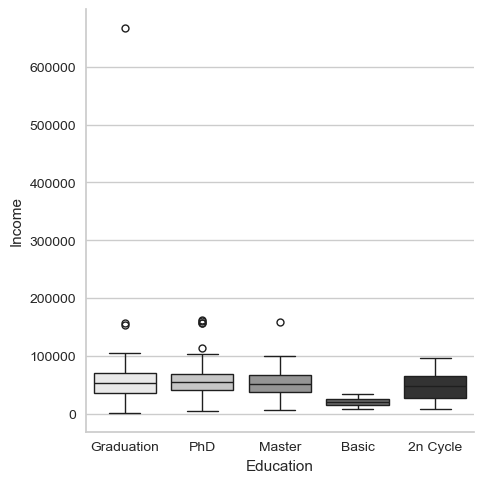

In [297]:
sns.catplot(data=data[~data["Income"].isna()], x="Education",y='Income',kind='box', palette=palette2)

In [298]:
# Get the group by table of the mean income for each education level
education_income_mean = data[~data["Income"].isna()].groupby("Education")["Income"].mean()
education_income_mean

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

In [299]:
# Fill the missing values with the mean income of the respective education level
def fill_income(row):
    if pd.isna(row['Income']):
        return education_income_mean[row['Education']]
    else:
        return row['Income']

data['Income'] = data.apply(fill_income, axis=1)

In [300]:
data[data["Income"].isna()].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


#### 3.2.3. Feature Engineering

##### a) Customer Education

In [301]:
data["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [302]:
#Simplify Customer Education
# IF
    # Basic & 2n Cycle > Undergraduate
    # Graduation > Graduate
    # Master & PhD > PostGraduate
data["Education"] = data["Education"].replace(["Basic","2n Cycle"],"Undergraduate")
data["Education"] = data["Education"].replace(["Graduation"],"Graduate")
data["Education"] = data["Education"].replace(["Master","PhD"],"PostGraduate")

#change to categories
data["Education"] = data["Education"].astype('category')

In [303]:
data["Education"].value_counts()

Education
Graduate         1127
PostGraduate      856
Undergraduate     257
Name: count, dtype: int64

##### b) Marital Status

In [304]:
data["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [305]:
data["Living_With"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

data["Living_With"] = data["Living_With"].astype('category')
#drop column Marital_Status
data = data.drop("Marital_Status", axis=1)

In [306]:
data["Living_With"].value_counts()

Living_With
Partner    1444
Alone       796
Name: count, dtype: int64

##### c) Dt_Customer

In [307]:
data["Dt_Customer"]

0       04/09/2012
1       08/03/2014
2       21/08/2013
3       10/02/2014
4       19/01/2014
           ...    
2235    13/06/2013
2236    10/06/2014
2237    25/01/2014
2238    24/01/2014
2239    15/10/2012
Name: Dt_Customer, Length: 2240, dtype: object

In [308]:
# Assuming df is your DataFrame
# Step 1: Convert Dt_Customer to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d/%m/%Y')  # Adjust format

# Step 2: Calculate the difference between the current date and the enrollment date
# We'll assume you want the number of days relative to "today's date"
current_date = pd.to_datetime('today')
data['Customer_since'] = (current_date - data['Dt_Customer']).dt.days

# Now the 'Customer_hace' column contains the number of days since each customer's enrollment

##### d) Boolean variables

In [309]:
#Change to Boolean
data["AcceptedCmp1"] = data["AcceptedCmp1"].astype('bool')
data["AcceptedCmp2"] = data["AcceptedCmp2"].astype('bool')
data["AcceptedCmp3"] = data["AcceptedCmp3"].astype('bool')
data["AcceptedCmp4"] = data["AcceptedCmp4"].astype('bool')
data["AcceptedCmp5"] = data["AcceptedCmp5"].astype('bool')
data["Response"] = data["Response"].astype('bool')
data["Complain"] = data["Complain"].astype('bool')

##### e) Calculate Age

In [310]:
#year today
today = datetime.datetime.now().year

data["Age"] = today-data["Year_Birth"]

##### f) Total Spent

In [311]:
data["TotalSpent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

##### g) Total Number of Sons

In [312]:
data["Sons"] = data["Kidhome"] + data["Teenhome"]

##### h) Parental Status

In [313]:
data["Is_Parent"] = np.where(data.Sons > 0, 1, 0)

##### i) Family Size

In [314]:
data['Living_With_Num'] = data['Living_With'].replace({"Alone": 1, "Partner": 2}).astype(int)
data["fam_size"] = data["Sons"] + data["Living_With_Num"]

##### j) Generation

In [315]:
# add generation based on the Year_Birth
def generation(year):
    if year < 1946:
        return "Silent"
    if year >= 1946 and year <= 1964:
        return "Boomers"
    elif year >= 1965 and year <= 1980:
        return "Generation X"
    elif year >= 1981 and year <= 1996:
        return "Millennials"
    else:
        return "Generation Z"

data["Generation"] = data["Year_Birth"].apply(generation)
data["Generation"] = data["Generation"].astype('category')


##### j) Remove Unnecesary Columns

In [316]:
#drop the followings columns
cols_to_drop = ['Year_Birth','Dt_Customer','Kidhome','Teenhome','Z_CostContact','Z_Revenue']
data = data.drop(cols_to_drop, axis=1)

#### 3.2.4. Main Stats

In [317]:
data.describe()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_since,Age,TotalSpent,Sons,Is_Parent,Living_With_Num,fam_size
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52253.592375,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,...,2.662054,5.790179,5.316518,4116.582143,55.194196,605.798214,0.950446,0.715179,1.644643,2.595089
std,3246.662198,25039.085601,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,...,2.923101,3.250958,2.426645,202.122512,11.984069,602.249288,0.751803,0.451430,0.478728,0.906959
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3763.000000,28.000000,5.000000,0.000000,0.000000,1.000000,1.000000
25%,2828.250000,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,0.000000,3.000000,3.000000,3943.750000,47.000000,68.750000,0.000000,0.000000,1.000000,2.000000
50%,5458.500000,51609.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,...,2.000000,5.000000,6.000000,4118.500000,54.000000,396.000000,1.000000,1.000000,2.000000,3.000000
75%,8427.750000,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,...,4.000000,8.000000,7.000000,4292.000000,65.000000,1045.500000,1.000000,1.000000,2.000000,3.000000
max,11191.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,...,28.000000,13.000000,20.000000,4462.000000,131.000000,2525.000000,3.000000,1.000000,2.000000,5.000000


Observations on Potential Outliers

+ Maximum age: There is a customer with an age of 131 years, which is highly unusual and likely an outlier.
+ Income distribution: The mean income is $52,247.25 with a standard deviation of $25,173.07. However, there is a maximum income value of $666,666.00, which is significantly higher than the average, indicating potential outliers in the Income data.

These outliers can have a strong influence on the results of the analysis, so it may be necessary to either cap or remove these extreme values. We can further investigate these outliers by plotting the distribution of Income and Age to visually inspect the data for any irregularities.

#### 3.2.5. Outlier Analysis

In [318]:
data.columns

Index(['ID', 'Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Living_With', 'Customer_since',
       'Age', 'TotalSpent', 'Sons', 'Is_Parent', 'Living_With_Num', 'fam_size',
       'Generation'],
      dtype='object')

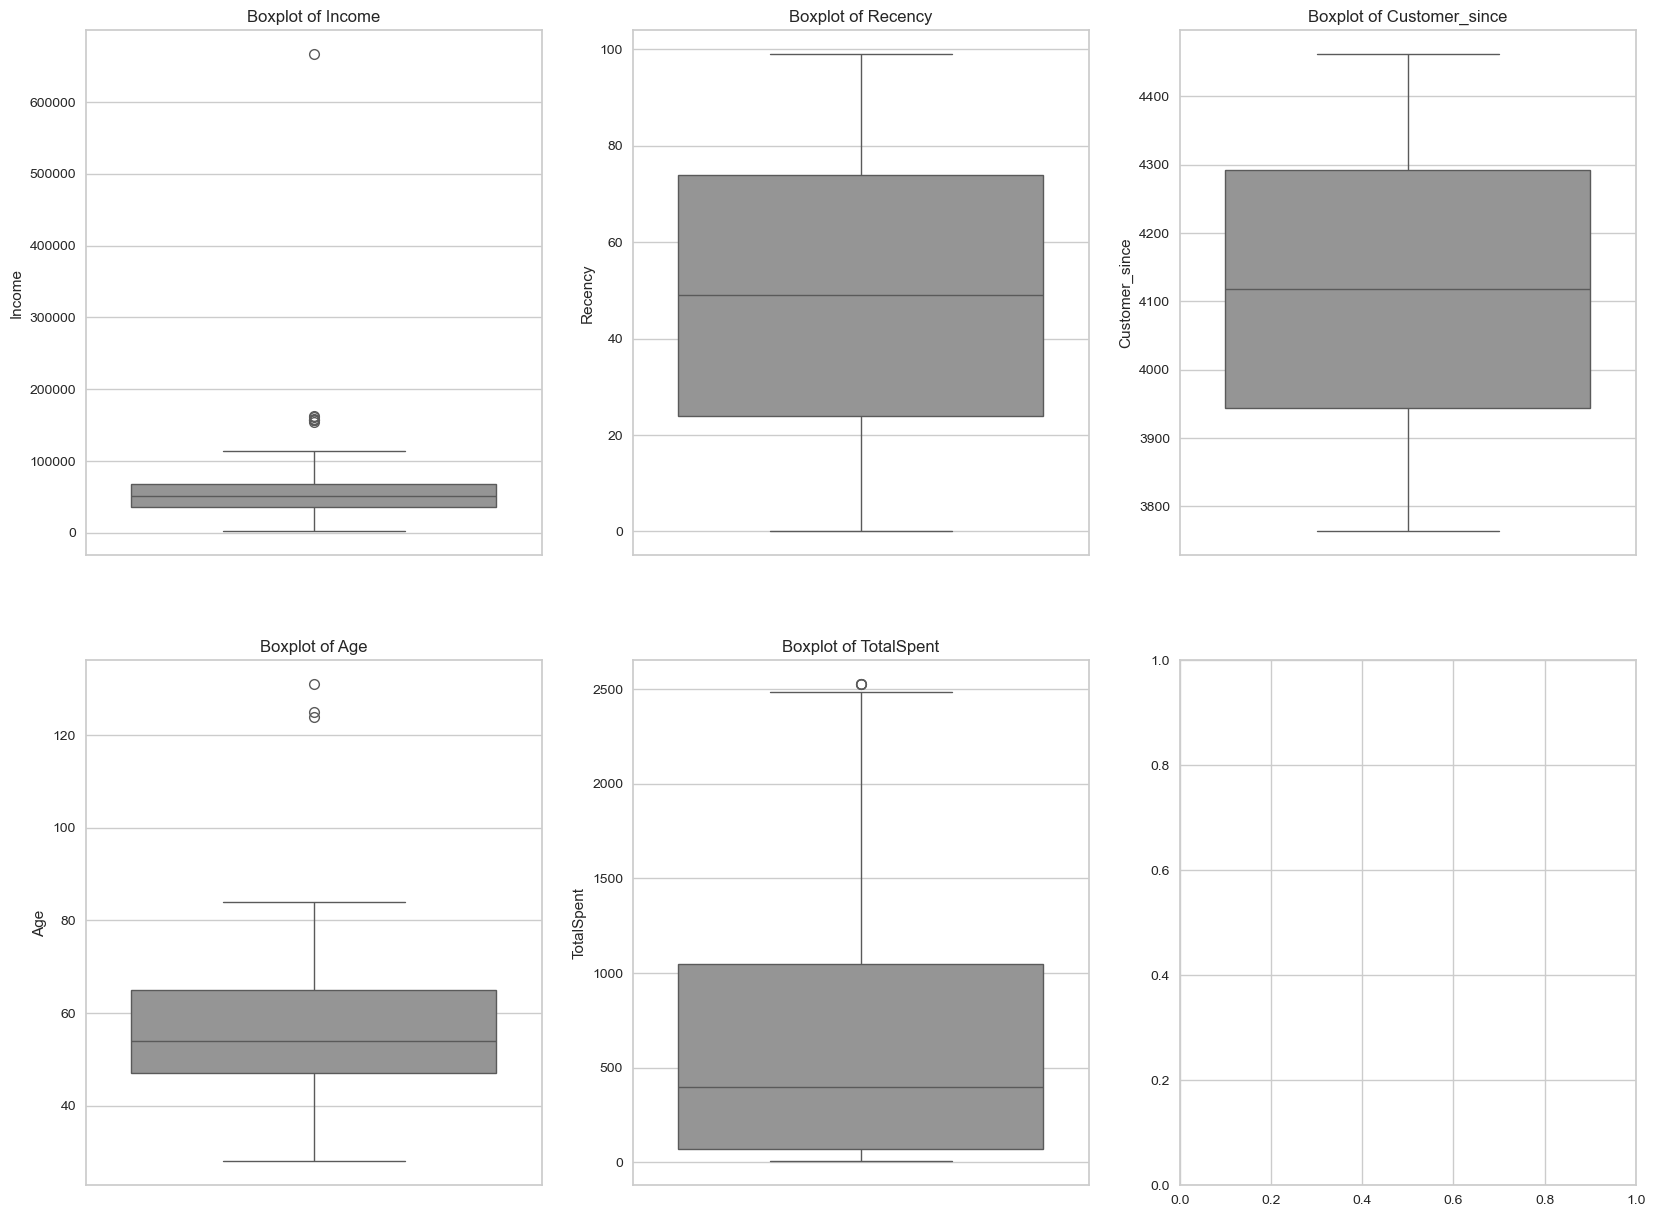

In [319]:
cols_to_plot = ["Income", "Recency", "Customer_since", "Age", "TotalSpent"]#, "fam_size"]

#plot boxplots for the cols to plot with seaborn
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
for i, col in enumerate(cols_to_plot):
    sns.boxplot(data=data[col], ax=axes[i//3, i%3], palette="Greys")
    axes[i//3, i%3].set_title(f"Boxplot of {col}")

In [320]:
# remove income outliers
data = data[data["Income"] < 200000]
# remove age outliers
data = data[data["Age"] > 0]
data = data[data["Age"] < 100]

#### 3.2.5. Correlation

<Axes: >

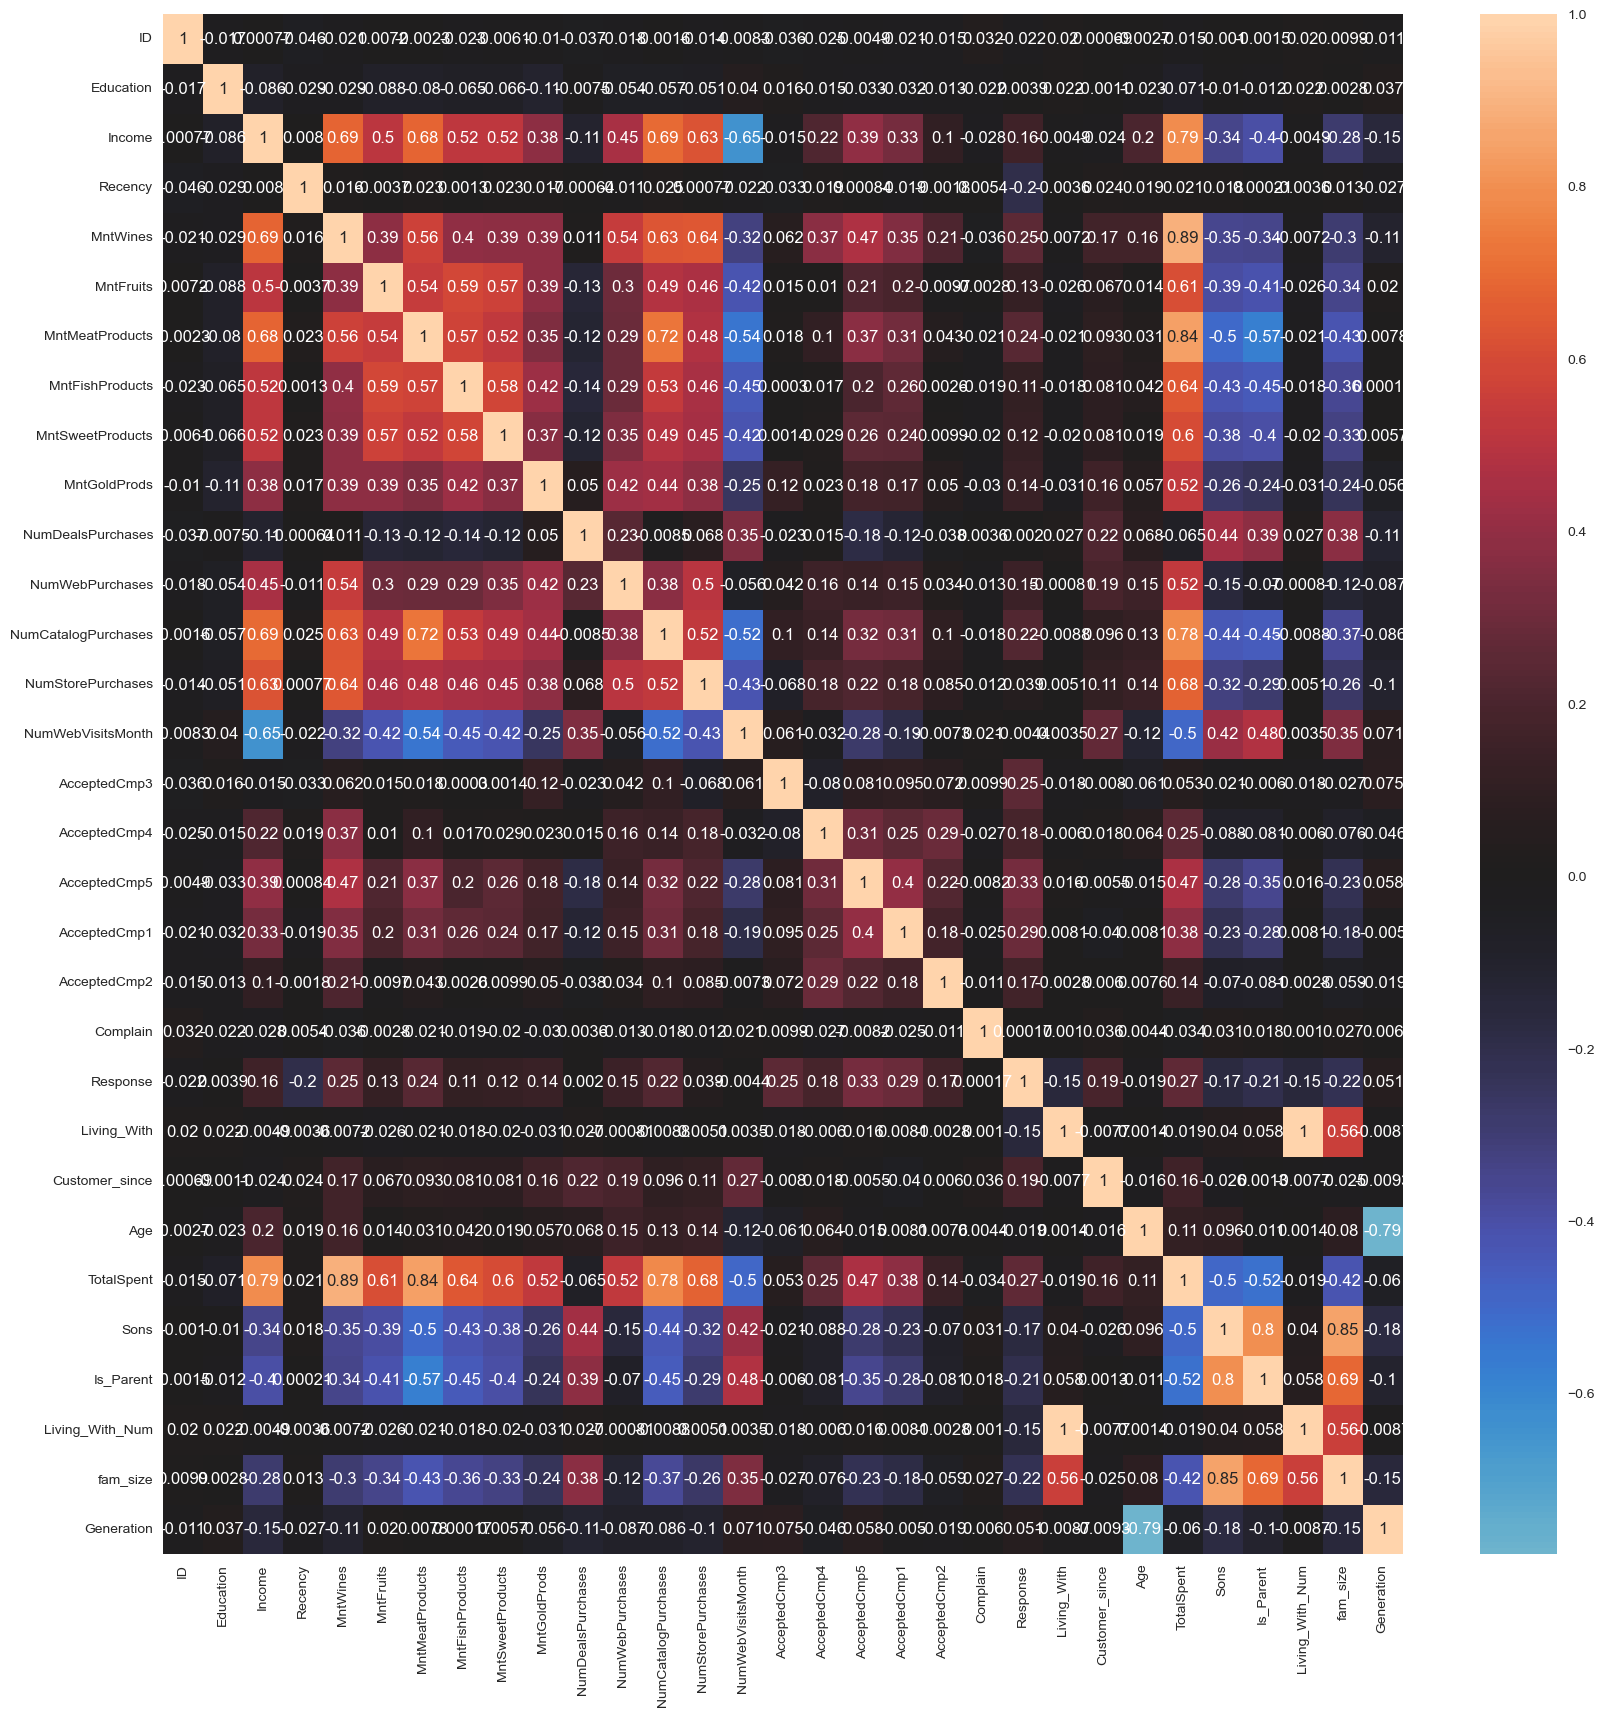

In [321]:
# Convert categorical variables to numerical values
data_encoded = data.copy()
data_encoded['Education'] = data_encoded['Education'].cat.codes
data_encoded['Living_With'] = data_encoded['Living_With'].cat.codes
data_encoded['Generation'] = data_encoded['Generation'].cat.codes

corrmat = data_encoded.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat, annot=True, center=0)


In [322]:
#print values with correlation > 0.6 or < -0.6
corrmat[(corrmat > 0.6) | (corrmat < -0.6)]

,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Living_With,Customer_since,Age,TotalSpent,Sons,Is_Parent,Living_With_Num,fam_size,Generation
ID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,NaN,NaN,1.000000,NaN,0.685917,NaN,0.683401,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.788986,NaN,NaN,NaN,NaN,NaN
Recency,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntWines,NaN,NaN,0.685917,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.891696,NaN,NaN,NaN,NaN,NaN
MntFruits,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.613122,NaN,NaN,NaN,NaN,NaN
MntMeatProducts,NaN,NaN,0.683401,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.842624,NaN,NaN,NaN,NaN,NaN
MntFishProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.642335,NaN,NaN,NaN,NaN,NaN
MntSweetProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,...,NaN,NaN,NaN,NaN,0.602610,NaN,NaN,NaN,NaN,NaN
MntGoldProds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.2.6. ML Pre-processing

##### 3.2.6.1. Label Encoding

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2236 non-null   int64   
 1   Education            2236 non-null   category
 2   Income               2236 non-null   float64 
 3   Recency              2236 non-null   int64   
 4   MntWines             2236 non-null   int64   
 5   MntFruits            2236 non-null   int64   
 6   MntMeatProducts      2236 non-null   int64   
 7   MntFishProducts      2236 non-null   int64   
 8   MntSweetProducts     2236 non-null   int64   
 9   MntGoldProds         2236 non-null   int64   
 10  NumDealsPurchases    2236 non-null   int64   
 11  NumWebPurchases      2236 non-null   int64   
 12  NumCatalogPurchases  2236 non-null   int64   
 13  NumStorePurchases    2236 non-null   int64   
 14  NumWebVisitsMonth    2236 non-null   int64   
 15  AcceptedCmp3         2236 

In [324]:
# First, I get the list of those attributes that contain variables in object format.
object_columns = data.select_dtypes(include=['object']).columns
print(object_columns)

# Second, I get the list of those attributes that contain variables in category format.
category_columns = data.select_dtypes(include=['category']).columns
print(category_columns)

Index([], dtype='object')
Index(['Education', 'Living_With', 'Generation'], dtype='object')


In [325]:
data_copy = data.copy() # Create a copy of the original data

In [326]:
LE = LabelEncoder()
for i in category_columns:
    data[i]=data[[i]].apply(LE.fit_transform)

##### 3.2.6.2 Crear un subset para la reduccion de dimensionalidad

In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Education            2236 non-null   int64  
 2   Income               2236 non-null   float64
 3   Recency              2236 non-null   int64  
 4   MntWines             2236 non-null   int64  
 5   MntFruits            2236 non-null   int64  
 6   MntMeatProducts      2236 non-null   int64  
 7   MntFishProducts      2236 non-null   int64  
 8   MntSweetProducts     2236 non-null   int64  
 9   MntGoldProds         2236 non-null   int64  
 10  NumDealsPurchases    2236 non-null   int64  
 11  NumWebPurchases      2236 non-null   int64  
 12  NumCatalogPurchases  2236 non-null   int64  
 13  NumStorePurchases    2236 non-null   int64  
 14  NumWebVisitsMonth    2236 non-null   int64  
 15  AcceptedCmp3         2236 non-null   bool  

In [328]:
# I create a copy of the data
ds = data.copy()

# I will remove the attributes related to accepted offers and complaints from this subset 
# (since they are not variables I want to reduce)
cols_del = ['ID','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

# To reduce the resulting matrix, I first need to normalize
# Scaling: I normalize
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)

In [329]:
scaled_ds.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,NumWebVisitsMonth,Living_With,Customer_since,Age,TotalSpent,Sons,Is_Parent,Living_With_Num,fam_size,Generation
0,-0.89438,0.288195,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,...,0.692865,-1.347635,1.529793,1.016868,1.680176,-1.264308,-1.584362,-1.347635,-1.758810,-1.169698
1,-0.89438,-0.262715,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,...,-0.131421,-1.347635,-1.191143,1.273264,-0.962202,1.395139,0.631169,-1.347635,0.445618,-1.169698
2,-0.89438,0.917627,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,...,-0.543564,0.742041,-0.206659,0.333146,0.282541,-1.264308,-1.584362,0.742041,-0.656596,0.199645
3,-0.89438,-1.182829,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,...,0.280722,0.742041,-1.062517,-1.290693,-0.918994,0.065416,0.631169,0.742041,0.445618,1.568987
4,0.57070,0.295435,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,...,-0.131421,0.742041,-0.953679,-1.034298,-0.305762,0.065416,0.631169,0.742041,0.445618,1.568987


### 3.3. Dim Reduction

There are two main approaches: PCA and t-SNE

#### 3.3.1. PCA

PCA (Principal Component Analysis) is a linear dimensionality reduction technique that transforms the original features into a set of uncorrelated components, ranking them by how much variance they explain. This method is useful for reducing the number of dimensions while retaining most of the data’s information. It is computationally efficient and deterministic, making it ideal for larger datasets where the relationships between features are linear. PCA is also interpretable since the principal components can be understood in terms of the original variables.

In [330]:
# I initialize PCA to reduce the dataset to 3 components
pca = PCA(n_components=3)

# I apply PCA only to the normalized data (see step 3.5.2)
pca.fit(scaled_ds)

# I create a matrix with the reduced data
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["PCA1","PCA2", "PCA3"]))

# I print the main statistics
PCA_ds.describe().T # T is for transpose: for easier data visualization

,count,mean,std,min,25%,50%,75%,max
PCA1,2236.0,-2.415083e-16,2.778086,-5.769621,-2.430733,-0.890596,2.269744,7.440979
PCA2,2236.0,3.177740e-17,1.654859,-4.756322,-1.073918,-0.037490,1.189357,5.307188
PCA3,2236.0,-3.098297e-17,1.444557,-3.205628,-1.157314,-0.185718,1.080934,4.470472


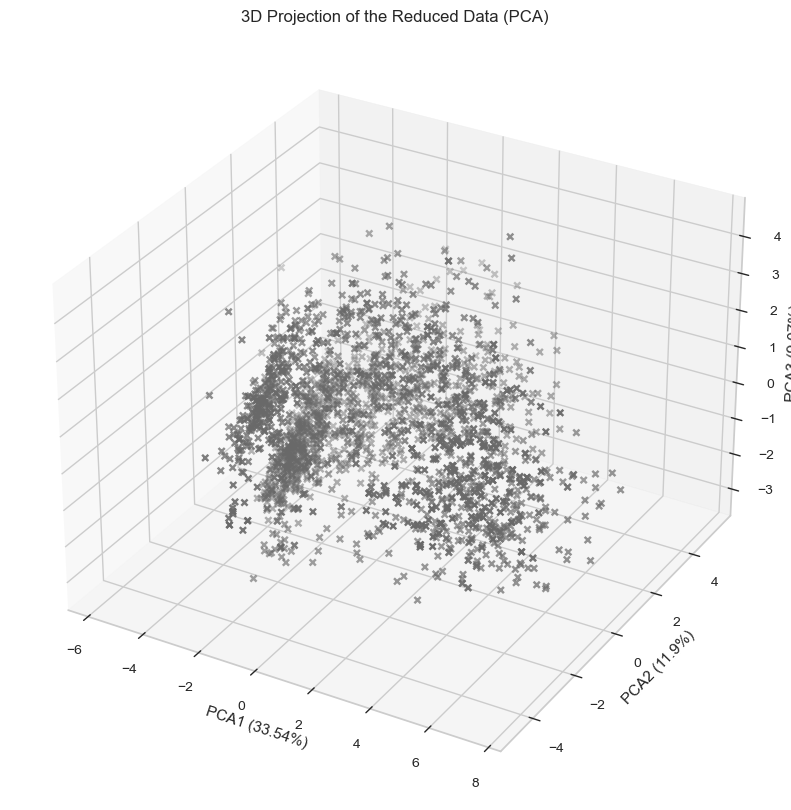

In [331]:
# Now I'm going to plot this
x = PCA_ds["PCA1"]
y = PCA_ds["PCA2"]
z = PCA_ds["PCA3"]

# To plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
#color grey
ax.scatter(x, y, z, c="#696969", marker="x")
ax.set_title("3D Projection of the Reduced Data (PCA)")
#add labels with explained variance
ax.set_xlabel(f"PCA1 ({round(pca.explained_variance_ratio_[0]*100,2)}%)")
ax.set_ylabel(f"PCA2 ({round(pca.explained_variance_ratio_[1]*100,2)}%)")
ax.set_zlabel(f"PCA3 ({round(pca.explained_variance_ratio_[2]*100,2)}%)")

plt.show()

#save image withou background
fig.savefig('PCA.png', transparent=True)

In [332]:
round(pca.explained_variance_ratio_[0]*100,2)+round(pca.explained_variance_ratio_[1]*100,2)+round(pca.explained_variance_ratio_[2]*100,2)


54.51

#### 3.3.2. t-SNE

On the other hand, t-SNE (t-Distributed Stochastic Neighbor Embedding) is a non-linear technique primarily used for visualizing high-dimensional data in 2D or 3D. It preserves local relationships between data points, ensuring that nearby points in the original space remain close in the lower-dimensional space. t-SNE is ideal for exploring complex, non-linear patterns but is computationally expensive and non-deterministic. While it excels at visualization, it lacks interpretability and scalability compared to PCA.

In [333]:
# I initialize t-SNE to reduce the dataset to 3 components
tsne = TSNE(n_components=3, perplexity=50)  # perplexity = 30 by default

# I apply t-SNE only to the normalized data (see step 3.5.2)
tsne.fit(scaled_ds)

# I create a matrix with the reduced data
TSNE_ds = pd.DataFrame(tsne.fit_transform(scaled_ds), columns=["TSNE1", "TSNE2", "TSNE3"])

# I print the main statistics
TSNE_ds.describe().T  # T is for transpose: for easier data visualization

,count,mean,std,min,25%,50%,75%,max
TSNE1,2236.0,0.551362,10.263330,-21.753374,-7.205177,-0.544795,7.722625,22.614775
TSNE2,2236.0,-0.507911,8.314673,-20.383327,-7.072189,0.943971,5.691303,17.883505
TSNE3,2236.0,-0.258511,8.394726,-16.804335,-7.022451,0.059005,5.389306,19.465218


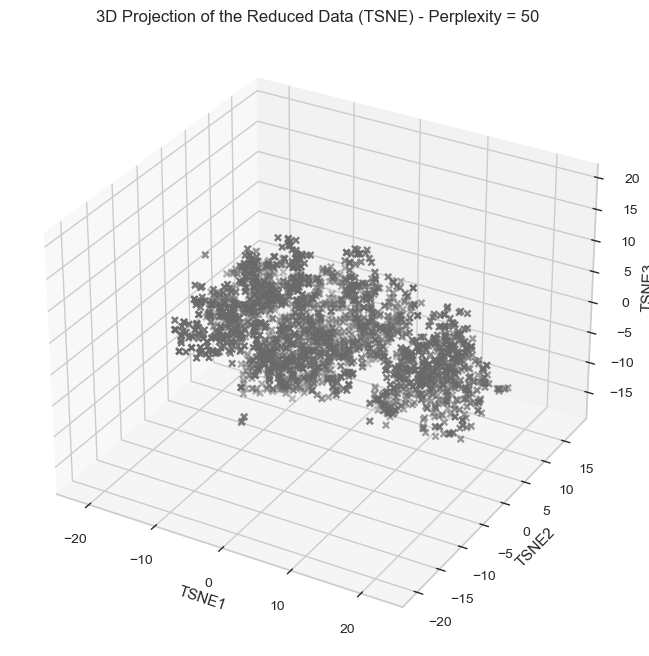

In [334]:
#Ahora voy a graficar esto
x = TSNE_ds["TSNE1"]
y = TSNE_ds["TSNE2"]
z = TSNE_ds["TSNE3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="#696969", marker="x" )
ax.set_title("3D Projection of the Reduced Data (TSNE) - Perplexity = 50")
#add labels with explained variance
ax.set_xlabel("TSNE1")
ax.set_ylabel("TSNE2")
ax.set_zlabel("TSNE3")

plt.show()

#Ver como al aumentar la perpexidad, los clusters se definen mejor (Aumenta la eficacia)
#Ojo: si se aumenta demasiado se corre el riesgo de acercar puntos a cluster a los que no corresponden

### 3.4. Clustering

We will proceed by applying two clustering methods: **Agglomerative Clustering** (also known as hierarchical clustering) and **K-Means**. Agglomerative clustering will allow us to build a hierarchy of clusters by successively merging or splitting groups of data points based on their similarity, providing a tree-like structure that helps us understand the relationships between clusters at different levels of granularity. On the other hand, K-Means will partition the data into a predefined number of clusters by minimizing the variance within each cluster, making it useful for identifying distinct groupings in the reduced dataset. By comparing the results of both methods, we aim to identify the most meaningful and well-separated clusters in the dataset.

#### 3.4.0. Elbow Method

Elbow Method to determine the number of clusters


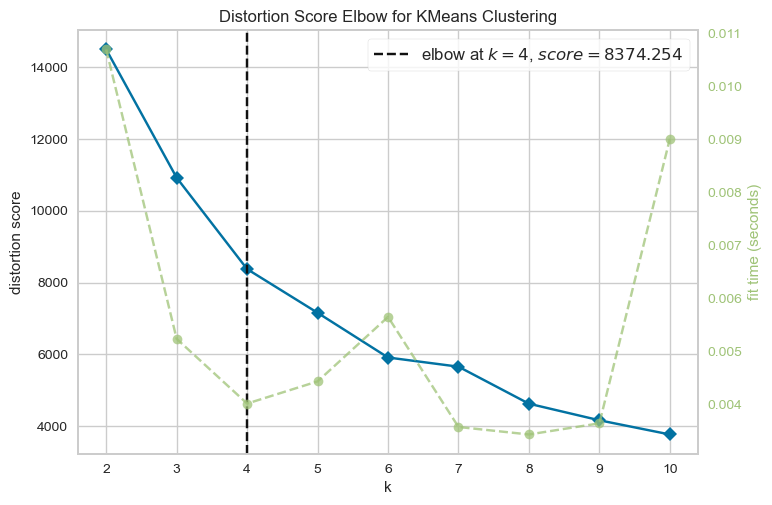

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<Figure size 800x550 with 0 Axes>

In [335]:
# Quick examination of the elbow method to determine the number of clusters to create.
print('Elbow Method to determine the number of clusters')
Elbow_M = KElbowVisualizer(KMeans(), k=10)  # Parameters: method: KMeans(), max k: 10

# Fit the model
Elbow_M.fit(PCA_ds)
#Elbow_M.fit(TSNE_ds)

# Display the plot
Elbow_M.show()

#donwload the image without background
Elbow_M.show(outpath="Elbow.png", transparent=True)

**Observations:**

From this, we can conclude that the optimal number of clusters to use is 4.

#### 3.4.1. Agglomerative Clustering

In [336]:
# I initialize the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)

# I fit the reduced data to the model and predict the clusters
clu_AC = AC.fit_predict(PCA_ds)
# clu_AC = AC.fit_predict(TSNE_ds)

# I add the clusters as an additional attribute to the reduced data matrix
PCA_ds["Clusters"] = clu_AC
# TSNE_ds["Clusters"] = clu_AC

# I add the clusters as an additional attribute to the original data matrix
data["Clusters"] = clu_AC

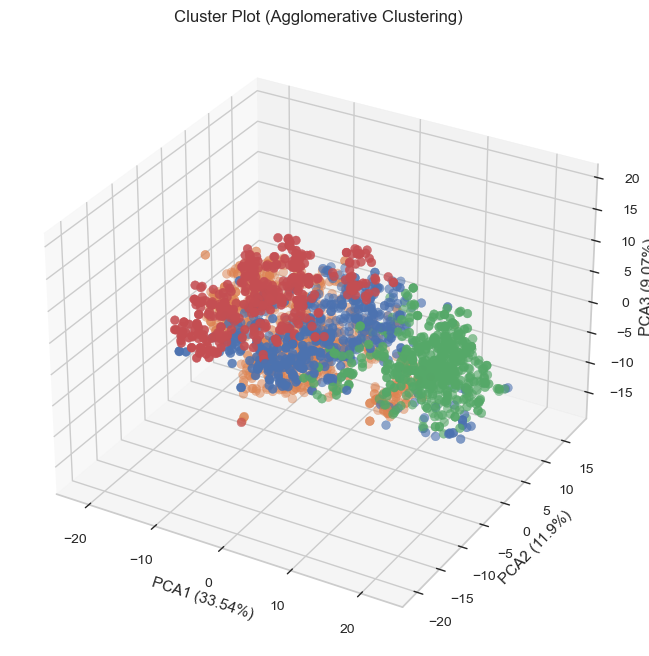

In [337]:
# Plotting
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap=ListedColormap(palette[0:4]))
# ax.scatter(x, y, z, s=40, c=TSNE_ds["Clusters"], marker='o', cmap=cmap)

# Color map library: https://matplotlib.org/stable/tutorials/colors/colormaps.html

ax.set_title("Cluster Plot (Agglomerative Clustering)")
#add labels with explained variance
ax.set_xlabel(f"PCA1 ({round(pca.explained_variance_ratio_[0]*100,2)}%)")
ax.set_ylabel(f"PCA2 ({round(pca.explained_variance_ratio_[1]*100,2)}%)")
ax.set_zlabel(f"PCA3 ({round(pca.explained_variance_ratio_[2]*100,2)}%)")

plt.show()

#save image without background
fig.savefig('Clusters.png', transparent=True)

#### 3.4.2. K-Means

In [338]:
# Do the same with K-Means
# Initialize the K-Means model
kmeans = KMeans(n_clusters=4)

# Fit the model
clu_Kmeans = kmeans.fit(PCA_ds)
# clu_Kmeans = kmeans.fit(TSNE_ds)

# Add the clusters as an additional attribute to the reduced data matrix
PCA_ds["Clusters kmeans"] = clu_Kmeans.labels_
# TSNE_ds["Clusters kmeans"] = clu_Kmeans.labels_

# Add the clusters as an additional attribute to the original data matrix
data["Clusters kmeans"] = clu_Kmeans.labels_

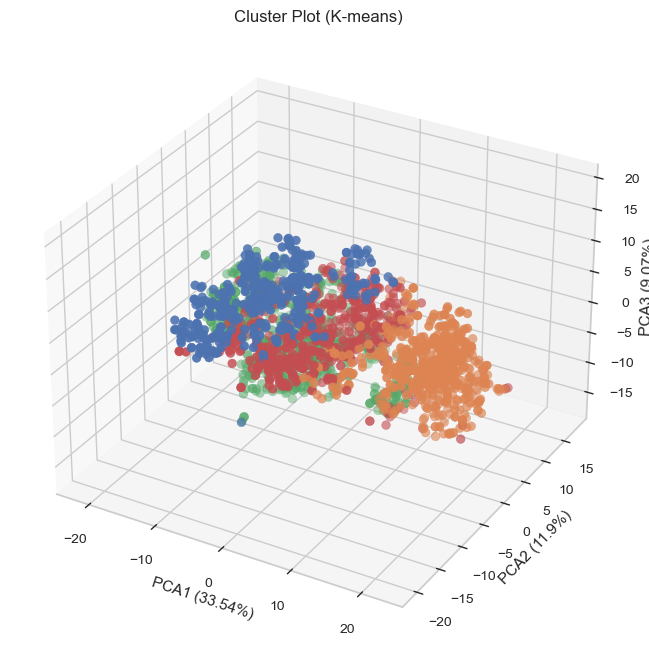

In [339]:
# Plotting
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")

ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters kmeans"], marker='o', cmap=ListedColormap(palette[0:4]))
# ax.scatter(x, y, z, s=40, c=TSNE_ds["Clusters kmeans"], marker='o', cmap=cmap)

# Color map library: https://matplotlib.org/stable/tutorials/colors/colormaps.html
#add labels with explained variance
ax.set_xlabel(f"PCA1 ({round(pca.explained_variance_ratio_[0]*100,2)}%)")
ax.set_ylabel(f"PCA2 ({round(pca.explained_variance_ratio_[1]*100,2)}%)")
ax.set_zlabel(f"PCA3 ({round(pca.explained_variance_ratio_[2]*100,2)}%)")

ax.set_title("Cluster Plot (K-means)")
plt.show()

### 3.5. Cluster Analysis

In [340]:
data.columns

Index(['ID', 'Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Living_With', 'Customer_since',
       'Age', 'TotalSpent', 'Sons', 'Is_Parent', 'Living_With_Num', 'fam_size',
       'Generation', 'Clusters', 'Clusters kmeans'],
      dtype='object')

In [341]:
#add cat column from data_copy to data
data["Education"] = data_copy["Education"]
data["Living_With"] = data_copy["Living_With"]
data["Generation"] = data_copy["Generation"]

#### 3.5.0. Motivation

In [342]:
# for  'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Reponse'
# Calculate total number of accepted campaigns and total number of rejected campaigns for each campaign

data["Total_Accepted"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"] + data["Response"]
data["Total_Rejected"] = 6 - data["Total_Accepted"]

# Now sum "Total_Accepted" and "Total_Rejected"
data["Total_Campaigns"] = data["Total_Accepted"] + data["Total_Rejected"]

met1 = (data["Total_Accepted"].sum() / data["Total_Campaigns"].sum()) * 100
print(f"Percentage of accepted campaigns: {met1:.2f}%")

# Percentage of acceptance per campaign
met1b = data[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum() / data[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].count() * 100
print(f"Percentage of acceptance per campaign: {met1b}%")

Percentage of accepted campaigns: 4.53%
Percentage of acceptance per campaign: AcceptedCmp1     6.440072
AcceptedCmp2     1.341682
AcceptedCmp3     7.289803
AcceptedCmp4     7.468694
AcceptedCmp5     7.245081
Response        14.937388
dtype: float64%


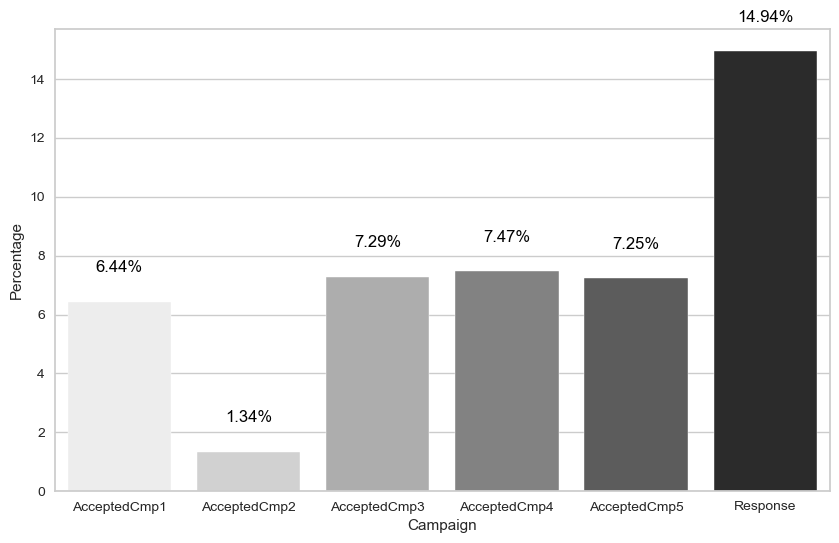

In [343]:
# add a plot with the percentage of acceptance per campaign
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=met1b.index, y=met1b.values, palette="Greys", ax=ax)
#ax.set_title("Percentage of acceptance per campaign")
ax.set_ylabel("Percentage")
ax.set_xlabel("Campaign")
#add labels
for i, v in enumerate(met1b):
    ax.text(i, v + 1, f"{v:.2f}%", color='black', ha='center')
plt.show()

#save without background
fig.savefig("percentage_acceptance_per_campaign.png", bbox_inches='tight', transparent=True)


In [344]:
# Calculation of Metric 2
# #DealsPurchases / #Total_Acepted Campaigns
met2 = data["NumDealsPurchases"].sum() / data["Total_Accepted"].sum()
print(f"Average number of purchases per accepted campaign: {met2:.2f}%")

Average number of purchases per accepted campaign: 8.55%


In [345]:
# Metric 3: #DealsPurchases / #TotalPurchases
# calculate total purchases (web, catalog, store)
data["TotalPurchases"] = data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"]

met3 = data["NumDealsPurchases"].sum() / data["TotalPurchases"].sum()
print(f"Average number of deals purchases per total purchases: {met3:.2f}%")

Average number of deals purchases per total purchases: 0.19%


In [346]:
# Metric 4: #TotalPurchases / #WebVisitsMonth
met4 = data["NumWebPurchases"].sum() / data["NumWebVisitsMonth"].sum()
print(f"Average number of web purchases per web visit: {met4:.2f}%")

Average number of web purchases per web visit: 0.77%


#### 3.5.1. Cluster Persona Definition

Analyze clusters
+ Persona Description: 'Age', 'Education', 'Income'
+ Family Shape: 'Living_With', 'Sons', 'Is_Parent', 'Living_With_Num', 'fam_size'

##### 3.5.1.1. Persona Description

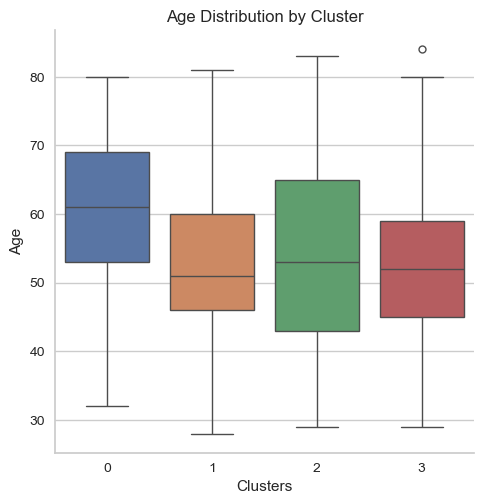

In [347]:
sns.catplot(data=data, x="Clusters", y="Age", kind="box", palette="deep")
plt.title("Age Distribution by Cluster")
#save without background
plt.savefig("plot.png", bbox_inches='tight', transparent=True)
plt.show()

This boxplot displays the distribution of ages within four different clusters (labeled 0, 1, 2, and 3).

Observations:
+ The median age across clusters seems to hover around 50 to 60 years.
+ Clusters 0 and 3 have more spread-out age distributions, with interquartile ranges (IQRs) that are wider than clusters 1 and 2.
+ Cluster 1 shows the narrowest IQR, suggesting less age variability within that group.
+ All clusters have similar overall ranges, spanning from approximately 30 to 80 years of age.

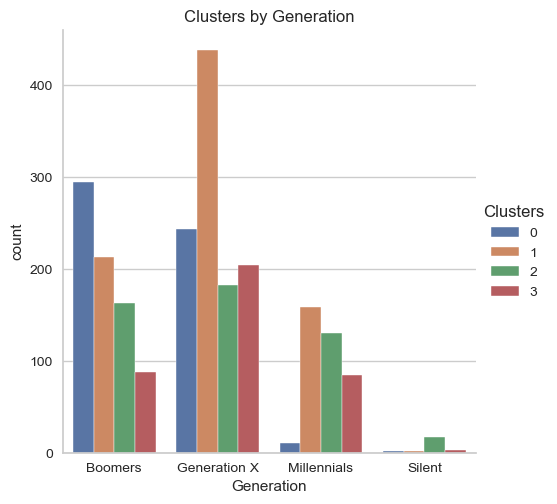

In [348]:
sns.catplot(data=data, x="Generation", hue="Clusters",  kind="count", palette="deep")
plt.title("Clusters by Generation")
#save without background
plt.savefig("plot.png", bbox_inches='tight', transparent=True)
plt.show()

This bar plot shows the number of people in each cluster, broken down by generational group (Boomers, Generation X, Millennials, Silent Generation).

Observations:
+ Cluster 0 has a large number of Generation X individuals and a notable number of Boomers, while Millennials and the Silent Generation are less represented.
+ Cluster 1 also has a significant number of Generation X members, though with more Millennials and fewer Boomers compared to Cluster 0.
+ Cluster 2 has a more balanced distribution, with Generation X as the largest group, followed by Boomers and a considerable presence of Millennials.
+ Cluster 3 is dominated by Boomers but also has representation from other generations, though not as much as the previous clusters.
+ Generation X is highly represented across all clusters, while the Silent Generation has very minimal representation overall.


Clusters seem to capture distinct generational and age-based groupings. Cluster 0 and 2 appears to contain more middle-aged (Generation X and Boomers), while Cluster 1 and 3 have a more evenly distributed generational composition.

In [349]:
# Group by "Clusters" and "Education", and count the size of each group
grouped_e = data.groupby(["Clusters", "Education"]).size().reset_index(name="Count")

# Calculate percentage for each "Education" level within each "Cluster"
grouped_e["Percentage"] = grouped_e.groupby("Clusters")["Count"].transform(lambda x: 100 * x / x.sum())

# Display the resulting DataFrame
grouped_e = pd.DataFrame(grouped_e)
grouped_e

,Clusters,Education,Count,Percentage
0,0,Graduate,287,52.087114
1,0,PostGraduate,232,42.105263
2,0,Undergraduate,32,5.807623
3,1,Graduate,382,47.044335
4,1,PostGraduate,309,38.054187
5,1,Undergraduate,121,14.901478
6,2,Graduate,268,54.361055
7,2,PostGraduate,177,35.902637
8,2,Undergraduate,48,9.736308
9,3,Graduate,189,49.736842


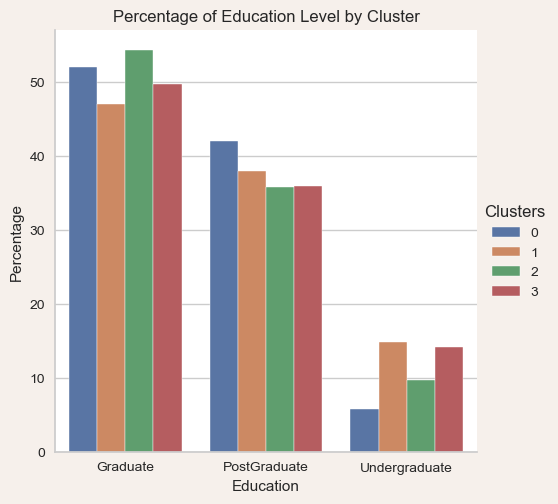

In [350]:
sns.catplot(data=grouped_e, x="Education", hue="Clusters", y="Percentage", kind="bar" , palette=palette)
#remove background color
plt.gcf().set_facecolor('#F6F0EB')
plt.title("Percentage of Education Level by Cluster")

#save without background
plt.savefig("plot.png", bbox_inches='tight', transparent=True)
plt.show()

This bar plot represents the distribution of education levels (Graduate, PostGraduate, Undergraduate) across four clusters (0, 1, 2, 3), with percentages on the y-axis.

Observations:

1. Graduates:
    + The largest proportion of individuals across all clusters fall into the “Graduate” category.
    + Clusters 1 and 3 have the highest percentage of Graduates, exceeding 50%.
    + Cluster 0 has slightly fewer Graduates than clusters 1 and 3, but the difference is minimal.
2.	Postgraduates:
    + There is a significant presence of Postgraduates across all clusters.
    + Cluster 0 leads in terms of the proportion of Postgraduates, at around 45%, followed closely by Clusters 2 and 3, which are similar.
    + Cluster 1 has a smaller percentage of Postgraduates compared to the other clusters but still maintains a significant share.
3.	Undergraduates:
    + Undergraduates make up the smallest percentage in all clusters, with the highest percentage being in Cluster 0, which appears to be just over 10%.
    + Clusters 1, 2, and 3 have lower Undergraduate percentages, all under 10%, with minimal variance between them.

Key Insights:
+ The clusters seem to capture different education-level profiles:
+ All clusters show a similar distribution in terms of education, with approximately 50% of individuals being Graduates, 40% being Postgraduates, and around 10% being Undergraduates.
+ The low representation of Undergraduates across clusters suggests that most individuals in these clusters have completed higher education, either as Graduates or Postgraduates.

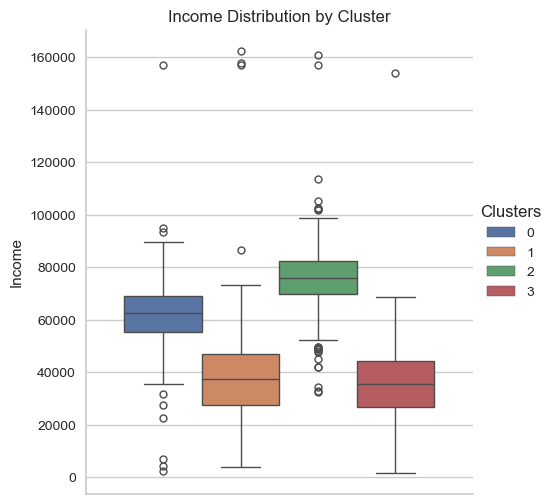

In [351]:
sns.catplot(data=data, hue="Clusters", y="Income", kind="box", palette=palette)
plt.title("Income Distribution by Cluster")

#save without background
plt.savefig("plot.png", bbox_inches='tight', transparent=True)
plt.show()

This boxplot represents the income distribution across four clusters (0, 1, 2, 3). Here’s an analysis of the chart:

Observations:

1. Cluster 0:
    + The median income is around $50,000.
    + The interquartile range (IQR) is wide, indicating variability in income levels.
    + There are several lower and higher outliers, with the maximum reaching about $160,000.
2.	Cluster 1:
    + The median income is higher, around $80,000, with a slightly narrower IQR compared to Cluster 0.
    + There are fewer outliers than in Cluster 0, and the range is more compact, with incomes generally falling between $60,000 and $100,000.
3.	Cluster 2:
    + The median income here is lower than in Cluster 1, around $45,000.
    + The IQR is relatively narrow, suggesting less variation within this group.
    + Outliers can be seen, both below and above, but overall the incomes are more concentrated around the median.
4.	Cluster 3:
    + The median income is comparable to Cluster 1, around $80,000, but the IQR is wider, suggesting more variability in incomes.
    + There are multiple outliers, particularly on the higher end, with incomes surpassing $150,000.

Key Insights:

+ Clusters 1 and 3: These clusters have higher median incomes, around $80,000, and generally display wider ranges of income, especially in Cluster 3.
+ Clusters 0 and 2: Both have lower median incomes, with Cluster 0 sitting at around $50,000 and Cluster 2 closer to $45,000. These clusters show more income variability, particularly in Cluster 0.
+ Outliers are present in all clusters, indicating that there are individuals with incomes significantly higher or lower than the central group.

+ The overall pattern shows that while Clusters 1 and 3 represent higher income groups, Clusters 0 and 2 tend to have lower incomes, with Cluster 0 having more variability in its income distribution.


**Observations**

These dataset belongs to the US, and based on the following categories:
+ Lower class: less than or equal to $30,000
+ Lower-middle class: $30,001 – $58,020
+ Middle class: $58,021 – $94,000
+ Upper-middle class: $94,001 – $153,000
+ Upper class: greater than $153,000


+ We could classify as Cluster 0 and 2 as Lower-middle class, Cluster 1 as Middle class; and Cluster 3 as Middle class and as Upper-middle class.

##### 3.5.1.2. Family Shape

In [352]:
data["Living_With"].value_counts()

Living_With
Partner    1442
Alone       794
Name: count, dtype: int64

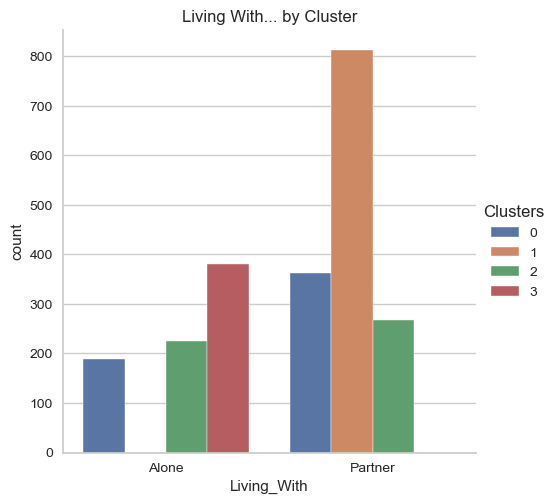

In [353]:
sns.catplot(data=data, x="Living_With", hue="Clusters",  kind="count", palette=palette)
plt.title("Living With... by Cluster")

#save without background
plt.savefig("plot.png", bbox_inches='tight', transparent=True)
plt.show()

This bar plot illustrates the living arrangements (either “Alone” or “With Partner”) across different clusters (0, 1, 2, 3), with the count of individuals on the y-axis.

Observations:
+ Living Alone: Cluster 2 and 3 
+ Living with Partner: Cluster 0 and 1


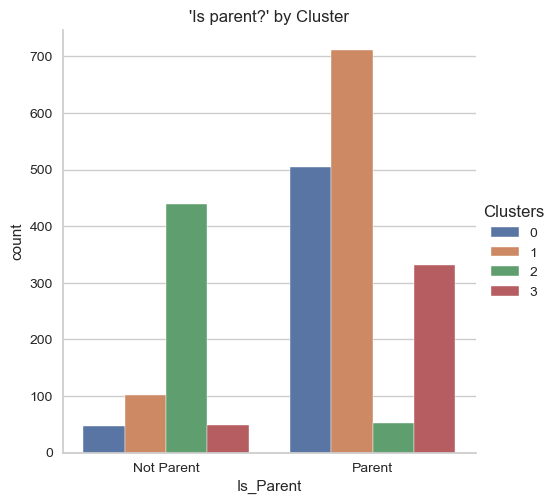

In [354]:
#Replace Is_Parent categories, if Is_Parent = 1, replace with "Parent", if Is_Parent = 0, replace with "Not Parent"
data["Is_Parent"] = data["Is_Parent"].replace({1:"Parent", 0:"Not Parent"})
sns.catplot(data=data, x="Is_Parent", hue="Clusters",  kind="count", palette=palette)
plt.title("'Is parent?' by Cluster")

#save without background
plt.savefig("plot.png", bbox_inches='tight', transparent=True)
plt.show()

+ Cluster 0 has a very high proportion of parents, with over 800 individuals, while very few in this cluster are not parents.
+ Cluster 2 also has a significant number of parents, though fewer than Cluster 0, with around 500 parents.
+ Cluster 1 has a balanced mix, with a moderate number of parents and non-parents, though the parent group is larger.
+ Cluster 3 shows the smallest group of parents, with more individuals identified as non-parents compared to the other clusters.

In summary, Clusters 0 and 2 have a strong representation of parents, whereas Cluster 3 has more non-parents, suggesting differences in family structure across clusters.

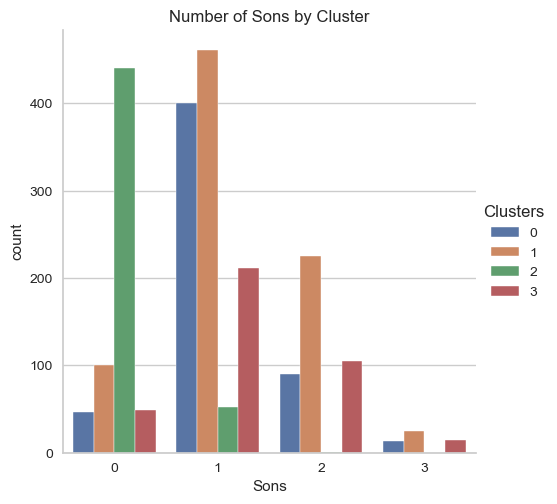

In [355]:
sns.catplot(data=data, x="Sons", hue="Clusters",  kind="count", palette=palette)
plt.title("Number of Sons by Cluster")

#save without background
plt.savefig("plot.png", bbox_inches='tight', transparent=True)
plt.show()

This bar plot shows the distribution of the number of sons (0, 1, 2, 3) across four clusters (0, 1, 2, 3).

Observations:

+ Cluster 0: The majority of individuals have no sons (over 500), with a substantial portion having one son. Fewer individuals in this cluster have two or more sons.
+ Cluster 1: The distribution is more balanced, with a large number of individuals having no sons and a significant portion having one or two sons. There are very few with three sons.
+ Cluster 2: Most individuals have one son, followed by a significant number with no sons. The number of individuals with two or more sons is smaller.
+ Cluster 3: This cluster shows smaller counts overall, but it has more individuals with no sons compared to other clusters.


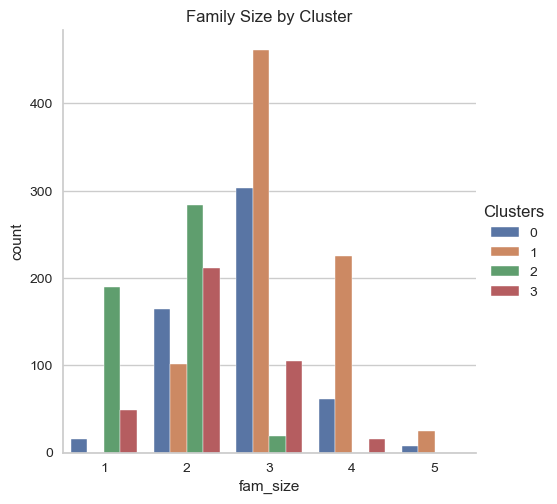

In [356]:
sns.catplot(data=data, x="fam_size", hue="Clusters",  kind="count", palette=palette)
plt.title("Family Size by Cluster")

#save without background
plt.savefig("plot.png", bbox_inches='tight', transparent=True)
plt.show()

This bar plot shows the distribution of family sizes (1 to 5 members) across the four clusters.

Observations:
+ Cluster 0: The most common family size in this cluster is 3 members, followed by 4 members. Family sizes larger than 3 are relatively rare.
+ Cluster 1: The family sizes in this cluster are more evenly distributed, with a notable number of individuals having 2 members. Family sizes of 3 members are also prominent.
+ Cluster 2: Most families have 2 or 3 members, with a smaller portion having 4 or more.
+ Cluster 3: This cluster is characterized by smaller family sizes, with most individuals having 1 or 2 family members.

Key Insights:

+ Number of Sons: Cluster 0 stands out as having the highest proportion of individuals with no sons, while Clusters 1 and 2 show more balance between individuals with one or two sons. Cluster 3 has a smaller population overall, with most having no sons.
+ Family Size: Cluster 0 is heavily skewed towards families with 3 members, while Cluster 1 has a more balanced distribution of family sizes, particularly around 2 and 3 members. Cluster 2 also shows a tendency towards smaller families. Cluster 3, being smaller, is mainly characterized by individuals with fewer family members.

In summary, Cluster 0 represents larger family structures, while Clusters 1 and 2 show more diversity in family sizes and number of sons. Cluster 3 generally represents smaller families with fewer children and single people.

#### 3.5.2. Cluster Persona Behaviour

Analyze clusters 
+ Fidelity: 'Recency', 'Customer_since', 'Complain'
+ Product: 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'TotalSpent'
+ Place:  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' 'NumWebVisitsMonth',
+ Promotions: 'NumDealsPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response'


##### 3.5.2.1. Fidelity

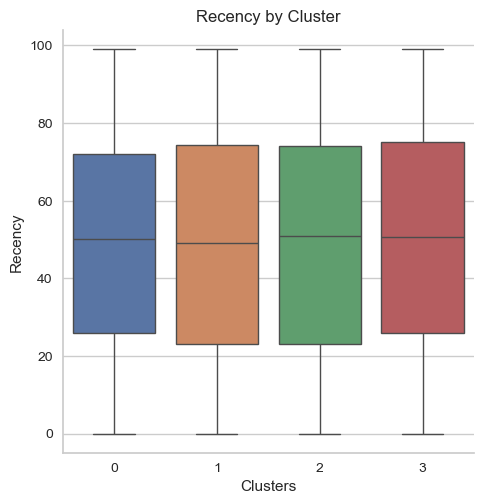

In [357]:
# Recency: Number of days since the last purchase
sns.catplot(data=data, x="Clusters", y="Recency",  kind="box", palette=palette)
plt.title("Recency by Cluster")

#save without background
plt.savefig("plot.png", bbox_inches='tight', transparent=True)
plt.show()


+ Recency refers to how recently a customer has made a purchase, where lower values indicate more recent interactions.
+ The boxplots for all four clusters (0, 1, 2, 3) show very similar distributions in terms of recency. The medians for all clusters hover around the 50-60 range, and the overall ranges extend from 0 to 100, which suggests that the time since the last purchase is fairly consistent across clusters.
+ There doesn’t seem to be a distinct pattern in terms of one cluster having significantly more recent customers than another, suggesting that recency isn’t a strong differentiating factor between clusters.

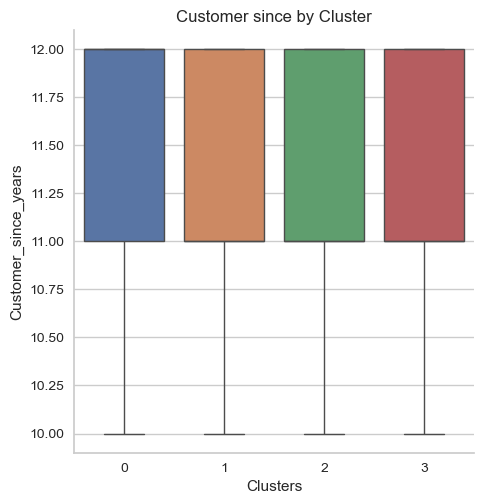

In [358]:
data["Customer_since_years"] = round(data["Customer_since"]/365,0)
sns.catplot(data=data, x="Clusters", y="Customer_since_years",  kind="box", palette=palette)
#change y axis ticks to months
plt.title("Customer since by Cluster")

#save without background
plt.savefig("plot.png", bbox_inches='tight', transparent=True)
plt.show()

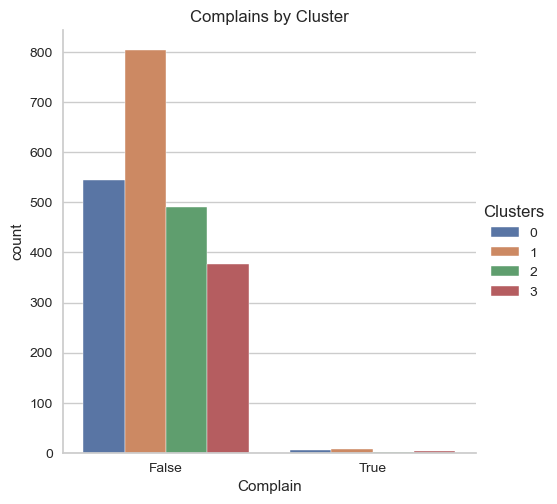

In [359]:
sns.catplot(data=data, x="Complain", hue = "Clusters",  kind="count", palette=palette)
plt.title("Complains by Cluster")

#save without background
plt.savefig("plot.png", bbox_inches='tight', transparent=True)
plt.show()

+ All groups seem to have customers who do not present complaints, with a majority in each cluster showing no complaints at all.

##### 3.5.2.1. Product

In [360]:
data.columns

Index(['ID', 'Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Living_With', 'Customer_since',
       'Age', 'TotalSpent', 'Sons', 'Is_Parent', 'Living_With_Num', 'fam_size',
       'Generation', 'Clusters', 'Clusters kmeans', 'Total_Accepted',
       'Total_Rejected', 'Total_Campaigns', 'TotalPurchases',
       'Customer_since_years'],
      dtype='object')

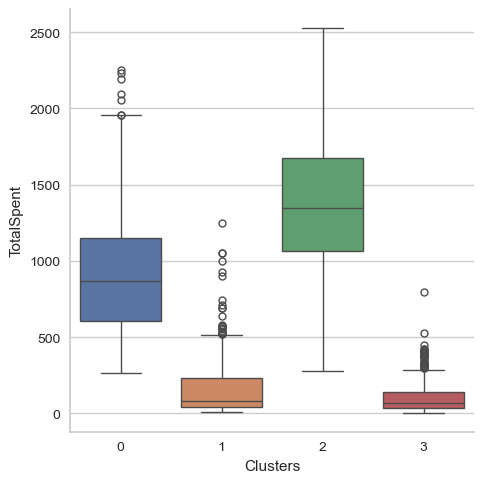

In [361]:
# Average Total Spending per Clusters
sns.catplot(data=data, x="Clusters", y="TotalSpent",  kind="box", palette=palette)

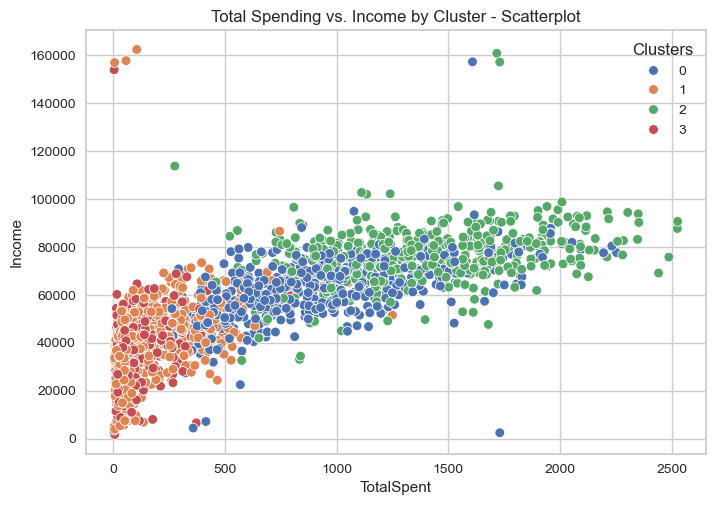

In [362]:
sns.scatterplot(data = data, x="TotalSpent", y="Income",hue="Clusters", palette=palette)

#title
plt.title("Total Spending vs. Income by Cluster - Scatterplot")

#save without background
plt.savefig("plot.png", bbox_inches='tight', transparent=True)
plt.show()


+ Positive Correlation: Across all clusters, there is a clear positive correlation between total spending and income. As income increases, total spending tends to increase as well, with higher-income individuals generally spending more.
+ Cluster 0 (Blue) and Cluster 2 (Green): These clusters is mostly concentrated in the lower income and spending range. The majority of individuals in Cluster 0 have an income below $60,000 and spend less than $1,000, suggesting they may be more budget-conscious or have less disposable income.
+ Clusters 1 (Orange) and 3 (Red): These clusters show more dispersion in both income and spending, with many individuals in Cluster 1 reaching incomes over $100,000 and spending between $1,000 and $2,000. Cluster 3, though smaller, also includes individuals in the higher income and spending ranges, indicating they represent higher earners and bigger spenders.

<Axes: xlabel='Clusters', ylabel='Spend_Perc_Inc'>

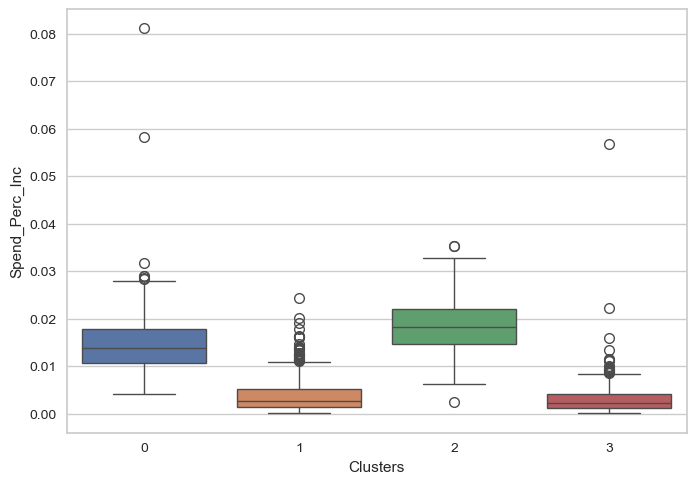

In [363]:
data["Spend_Perc_Inc"] = data["TotalSpent"] / data["Income"]
sns.boxplot(data=data[data["Spend_Perc_Inc"]<0.4], x="Clusters", y="Spend_Perc_Inc", palette=palette)

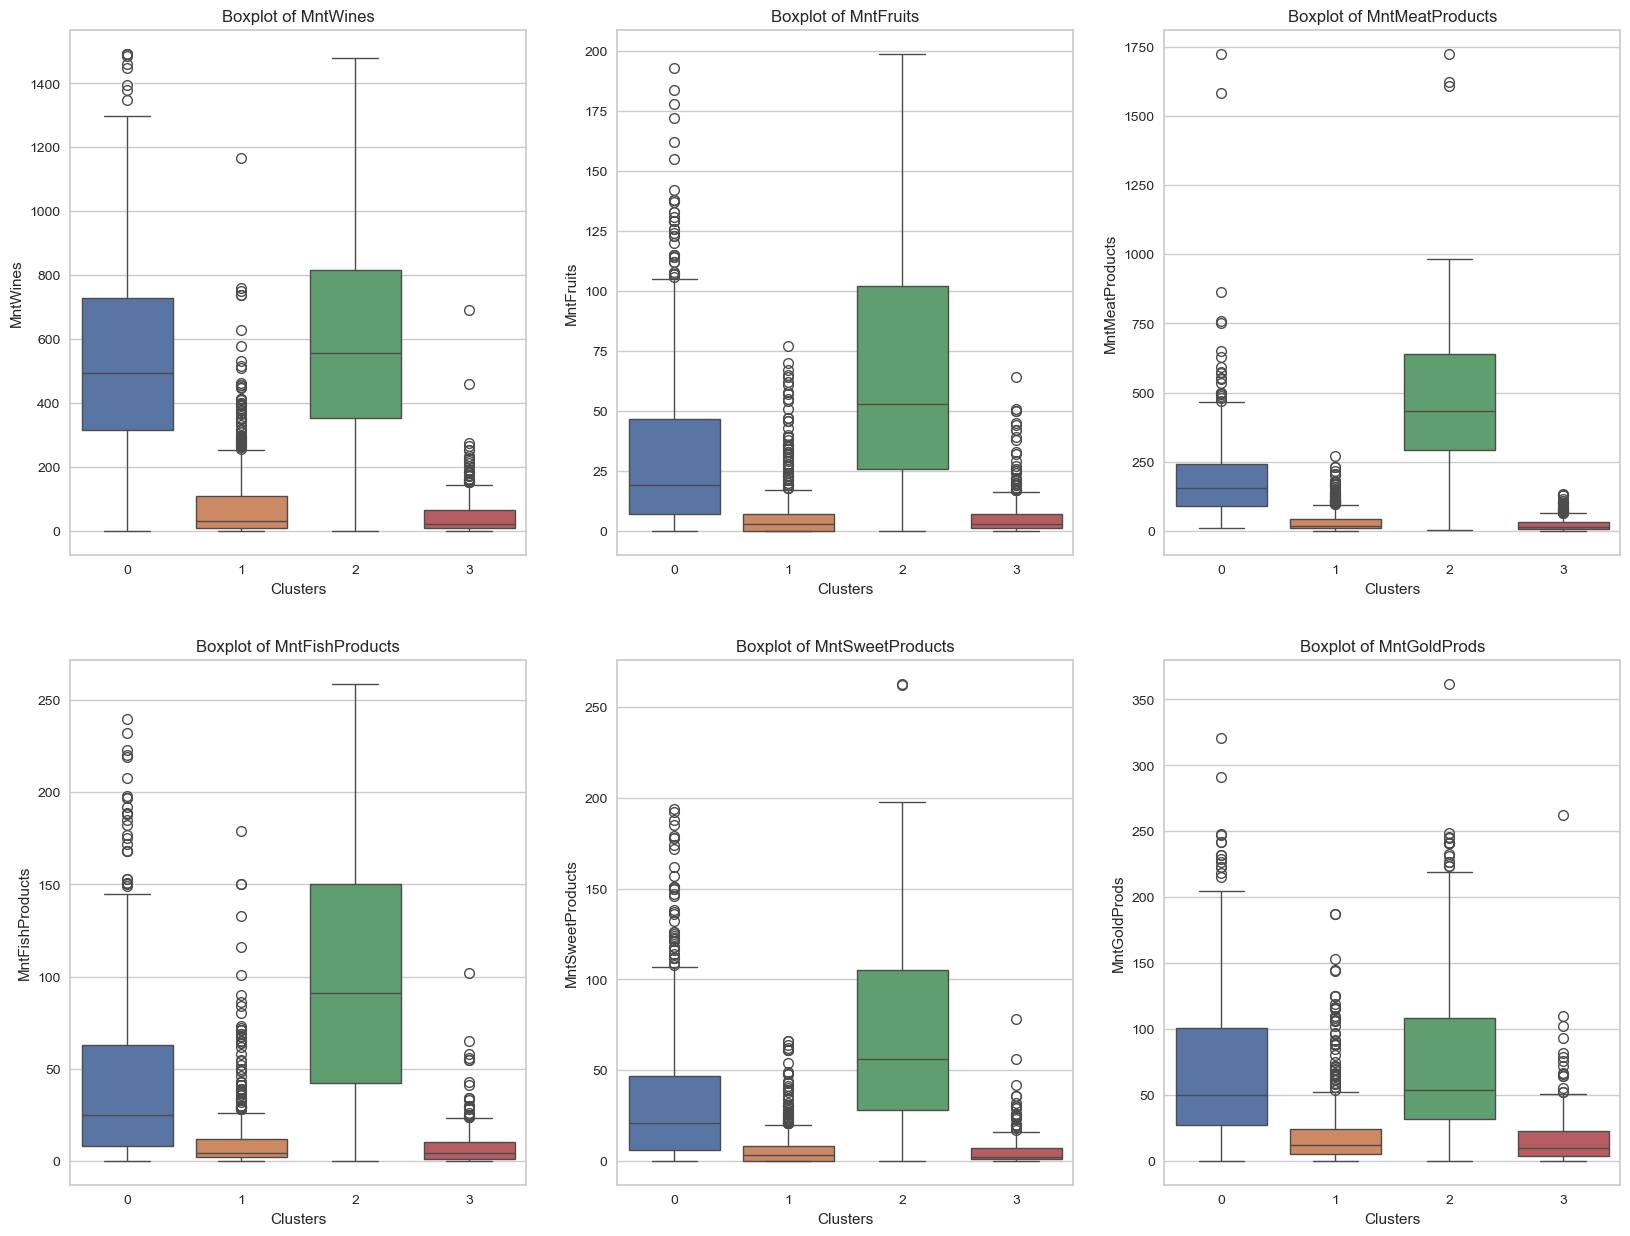

In [364]:
# Average Spending per Product per Clusters
cols = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

fig, axes = plt.subplots(2, 3, figsize=(20, 15))
for i, col in enumerate(cols):
    sns.boxplot(data=data, x="Clusters", y=col, ax=axes[i//3, i%3], palette=palette)
    axes[i//3, i%3].set_title(f"Boxplot of {col}")



In [365]:
# Calculate % Spending per Product (Total Spending per Product / Total Spending)
cols = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

for i, col in enumerate(cols):
    data[f"{col}_Perc"] = data[col] / data["TotalSpent"]

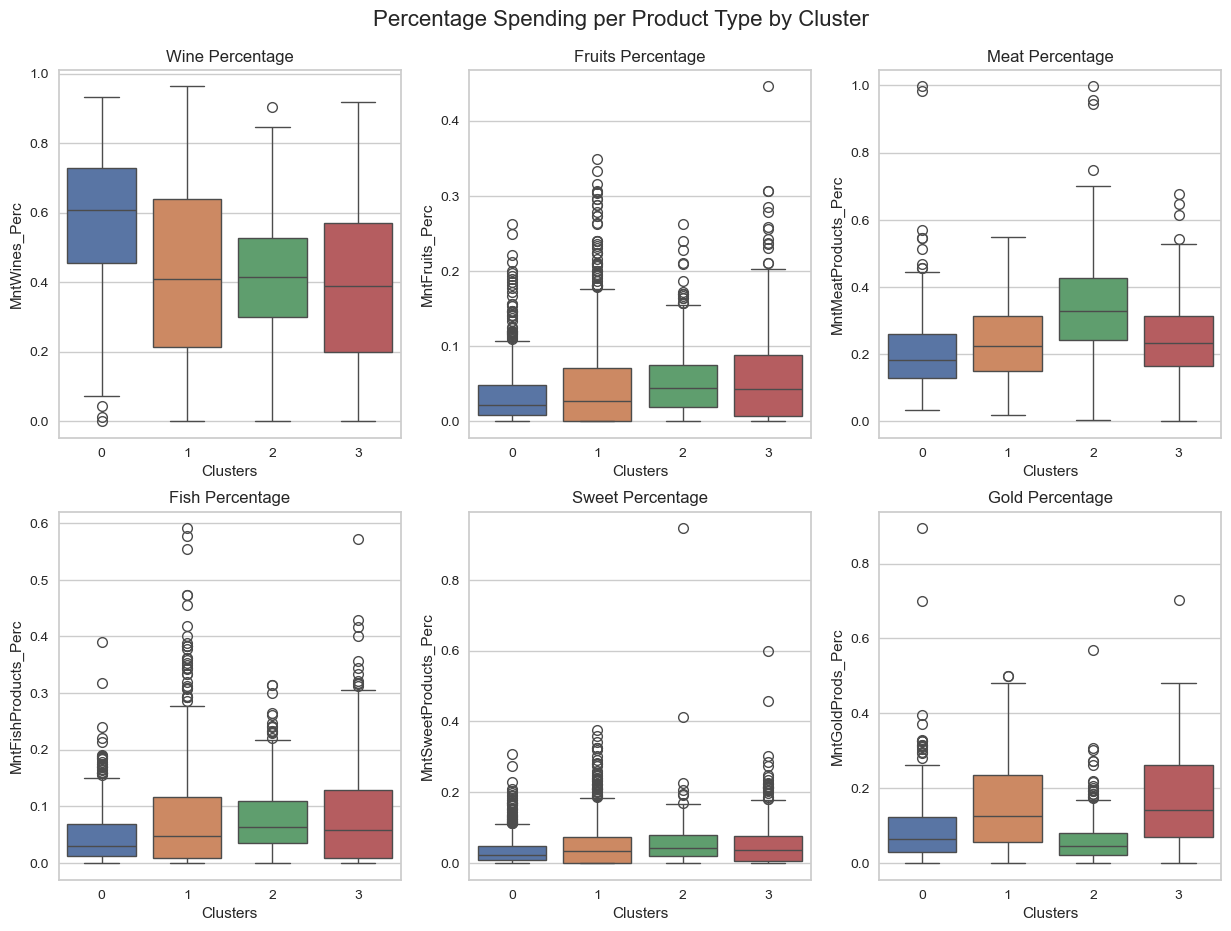

In [366]:
cols = ["MntWines_Perc", "MntFruits_Perc", "MntMeatProducts_Perc", "MntFishProducts_Perc", "MntSweetProducts_Perc", "MntGoldProds_Perc"]
subtitles = ["Wine Percentage", "Fruits Percentage", "Meat Percentage", "Fish Percentage", "Sweet Percentage", "Gold Percentage"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Set overall title
fig.suptitle("Percentage Spending per Product Type by Cluster", fontsize=16)
plt.subplots_adjust(top=0.92)

for i, col in enumerate(cols):
    sns.boxplot(data=data, x="Clusters", y=col, ax=axes[i//3, i%3], palette=palette)
    # Set individual subtitles
    axes[i//3, i%3].set_title(subtitles[i])

# Save without background    
plt.savefig("plot.png", bbox_inches='tight', transparent=True)

# Show plot
plt.show()

**Wine Products (Top Left):**
+ Similar Medians: Clusters 0, 1, and 2 have similar median percentages for wine spending, while Cluster 3 has a slightly smaller median, indicating lower wine spending in this group.
+ Spread: Clusters 0 and 2 show a wider spread, suggesting more variability in how much individuals in these clusters spend on wine. Cluster 1 and 3 have narrower ranges, indicating more consistent spending habits within those groups.

**Fruit Products (Top Middle):**
+ Cluster 0 has a lower median percentage of spending on fruits compared to the other clusters.
+ All clusters display a generally low percentage of spending on fruit products, with many outliers, particularly in Cluster 0 (Blue) and 1 (Orange).

**Meat Products (Top Right):**
+ Highest Median: Cluster 3 (Red) shows the highest median spending on meat products, followed closely by Cluster 1 (Orange).
+ Lower Medians: Clusters 0 and 2 have lower median spending on meat, indicating less emphasis on meat consumption in these clusters.

**Fish Products (Bottom Left)**
+ Relatively Low Spending: Spending on fish products is relatively low across all clusters, with Clusters 1 and 3 showing slightly higher median spending compared to others.
+ Outliers: There are several outliers across clusters, particularly in Clusters 0 and 2, indicating that a few individuals in these groups spend significantly more on fish than the average.

**Sweet Products (Bottom Middle):**
+ Low Median Spending: All clusters exhibit low median spending on sweet products, with some outliers, particularly in Clusters 0 and 2.
+ Lowest Spread: Cluster 1 shows the lowest spread, indicating more consistent spending on sweet products within this group.

**Gold Products (Bottom Right):**
+ Clusterd 0 and 2 shows the highest median spending on gold products, with a few significant outliers.
+ Clusters 1, and 3 show much lower median spending, with less variability compared to Cluster 0.

These plots suggest that different clusters have distinct preferences for product categories, with Cluster 0 standing out in wine and gold spending, while Cluster 3 shows a preference for meat products.

In [367]:
# Then % Spending per Product (Total Spending per Product / Income)
# Calculate % Spending per Product (Total Spending per Product / Total Spending)
cols = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

for i, col in enumerate(cols):
    data[f"{col}_Perc_Inc"] = data[col] / data["Income"]

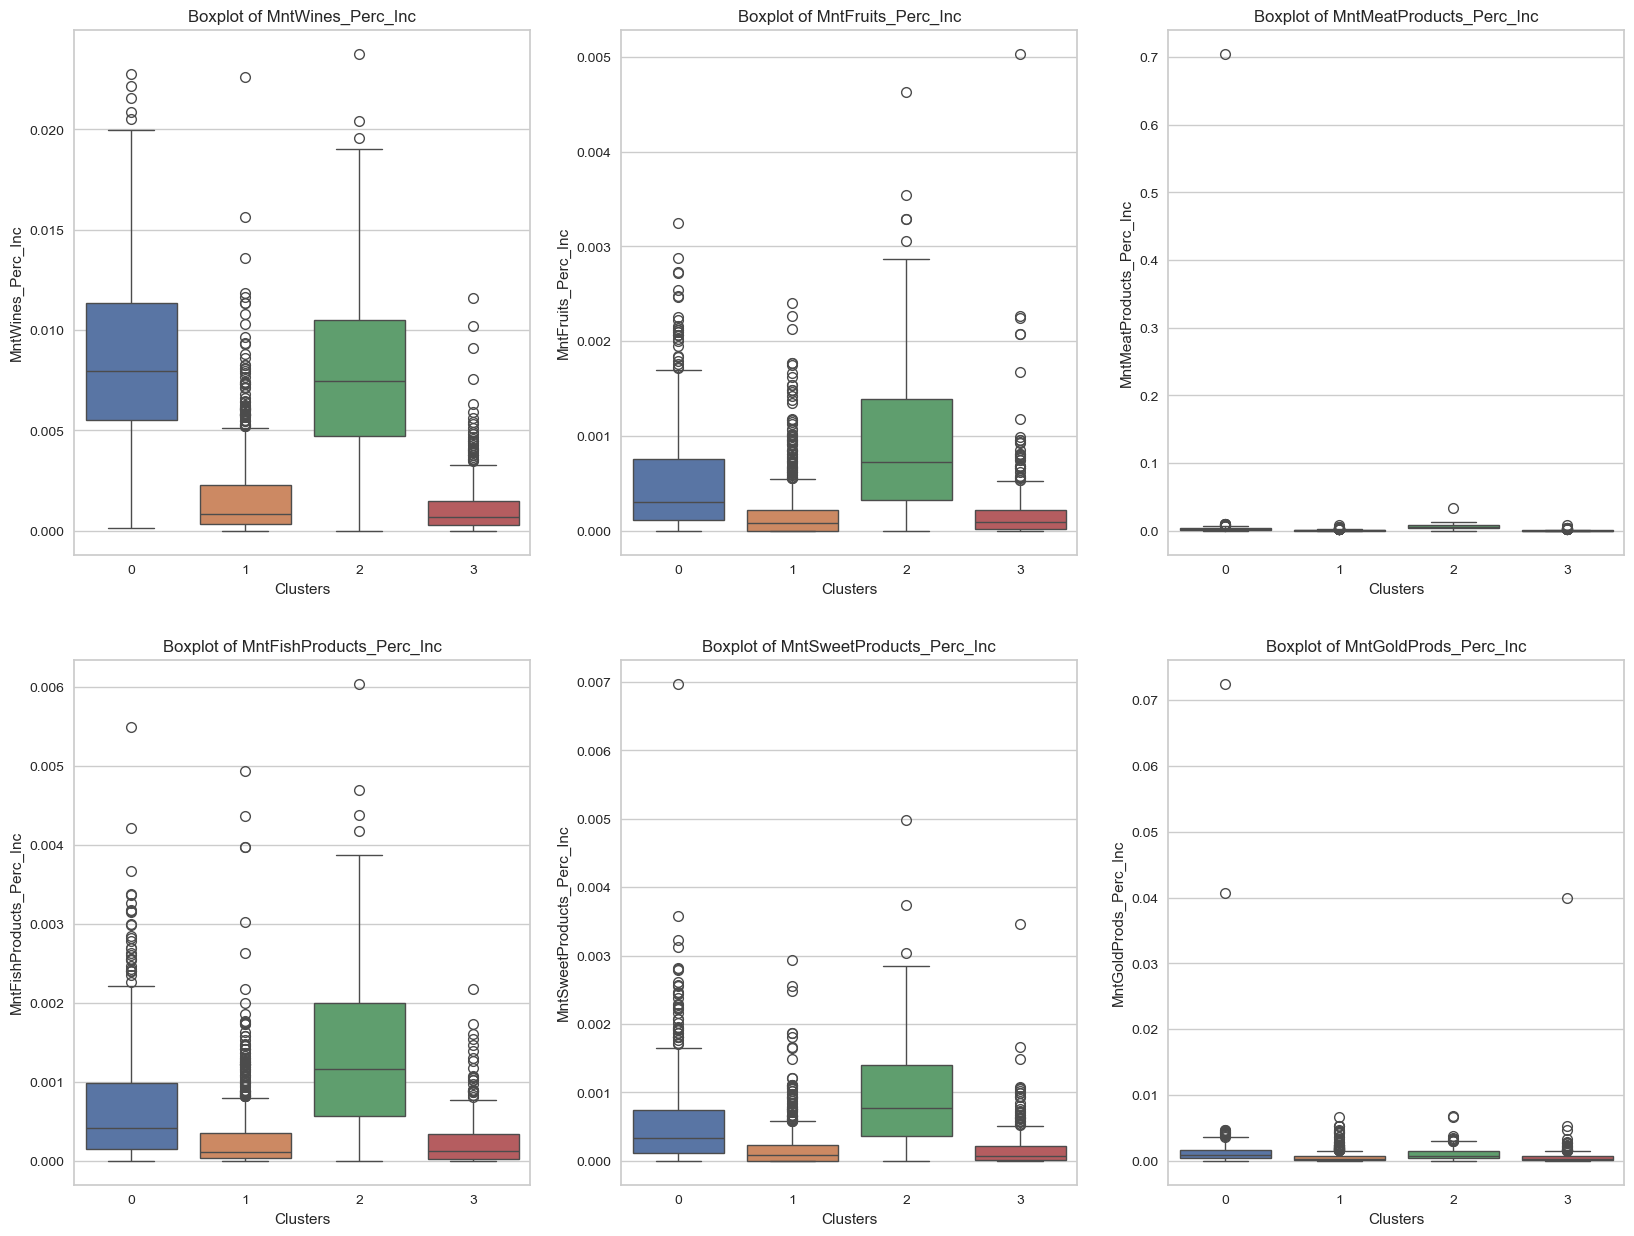

In [368]:
cols = ["MntWines_Perc_Inc", "MntFruits_Perc_Inc", "MntMeatProducts_Perc_Inc", "MntFishProducts_Perc_Inc", "MntSweetProducts_Perc_Inc", "MntGoldProds_Perc_Inc"]
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
for i, col in enumerate(cols):
    sns.boxplot(data=data, x="Clusters", y=col, ax=axes[i//3, i%3], palette=palette)
    axes[i//3, i%3].set_title(f"Boxplot of {col}")

##### 3.5.2.1. Place


+ Place:  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' 'NumWebVisitsMonth',


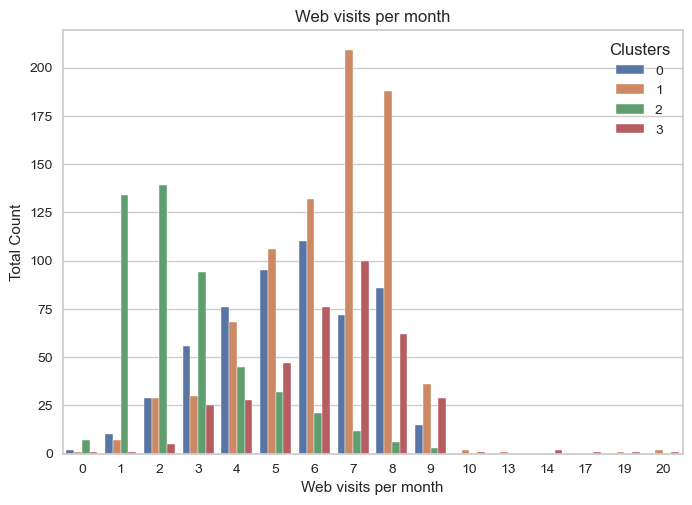

In [369]:
ax = sns.countplot(x=data["NumWebVisitsMonth"],hue=data["Clusters"], palette= palette)
ax.set_title("Web visits per month")
ax.set_xlabel("Web visits per month")
ax.set_ylabel("Total Count")

#save without background
plt.savefig("plot.png", bbox_inches='tight', transparent=True)

plt.show()

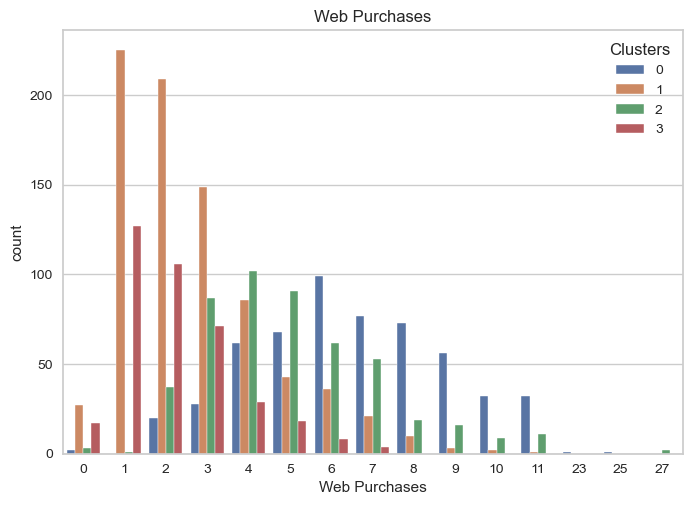

In [370]:
plt.figure()
pl = sns.countplot(x=data["NumWebPurchases"],hue=data["Clusters"], palette= palette)
pl.set_title("Web Purchases")
pl.set_xlabel("Web Purchases")
plt.show()

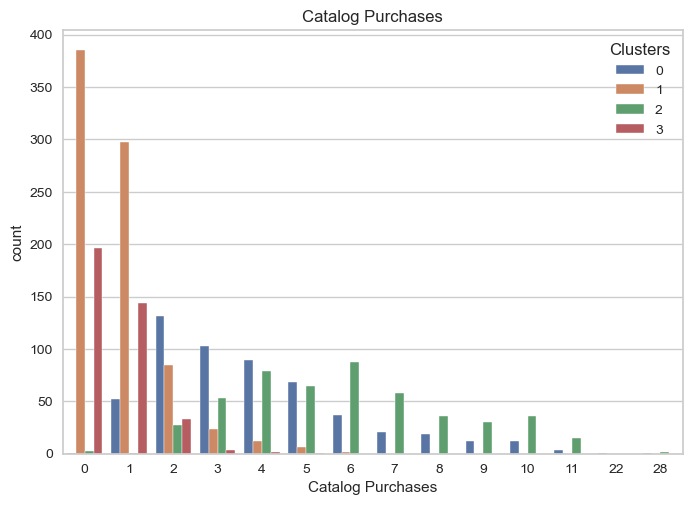

In [371]:
plt.figure()
pl = sns.countplot(x=data["NumCatalogPurchases"],hue=data["Clusters"], palette= palette)
pl.set_title("Catalog Purchases")
pl.set_xlabel("Catalog Purchases")
plt.show()

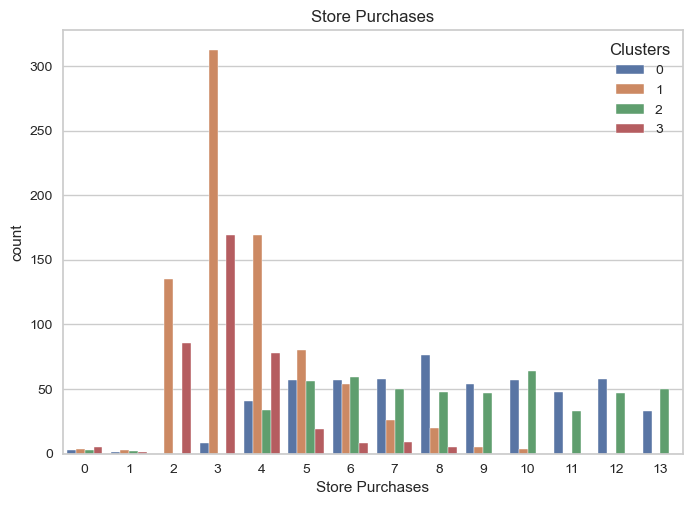

In [372]:
plt.figure()
pl = sns.countplot(x=data["NumStorePurchases"],hue=data["Clusters"], palette= palette)
pl.set_title("Store Purchases")
pl.set_xlabel("Store Purchases")
plt.show()

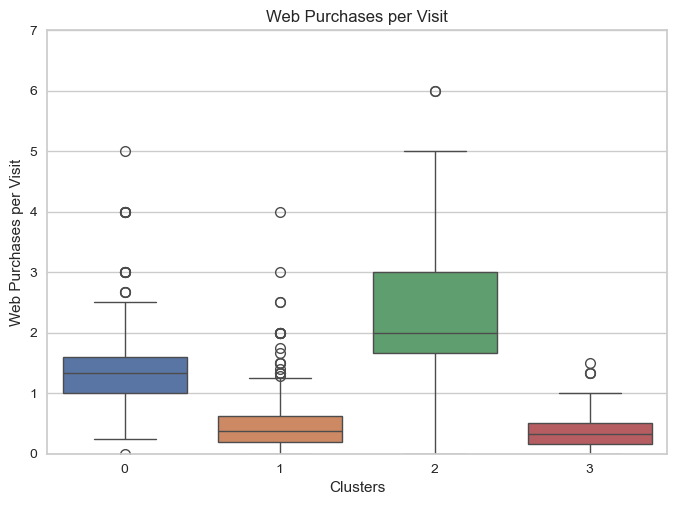

In [373]:
# web purchases / web visits
data["WebPurch_Visit"] = data["NumWebPurchases"] / data["NumWebVisitsMonth"]

#plt.figure()
ax = sns.boxplot(data=data, x="Clusters", y="WebPurch_Visit", palette=palette)
ax.set_title("Web Purchases per Visit")
ax.set_xlabel("Clusters")
ax.set_ylabel("Web Purchases per Visit")

#max y value =10
ax.set_ylim(0, 7)

#save without background
plt.savefig("plot.png", bbox_inches='tight', transparent=True)
plt.show()


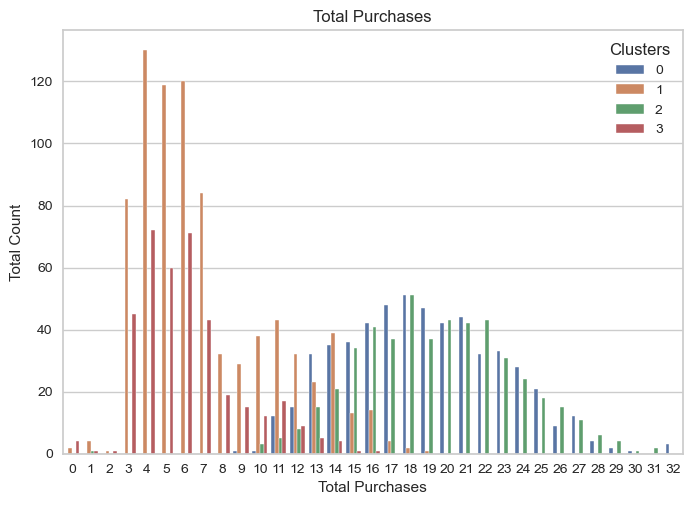

In [374]:
ax = sns.countplot(x=data["TotalPurchases"], hue=data["Clusters"], palette= palette)
#title and axis labels
ax.set_title("Total Purchases")
ax.set_xlabel("Total Purchases")
ax.set_ylabel("Total Count")

#save without background
plt.savefig("plot.png", bbox_inches='tight', transparent=True)

#show plot
plt.show()

In [375]:
# stacked bar plot with the sum of total purchases (web, catalog, store) per cluster  
data_grouped = data.groupby("Clusters")[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum()
data_grouped = data_grouped.reset_index()

#data_grouped.plot(kind="bar", stacked=True, color=palette, figsize=(10, 6))

data_grouped

,Clusters,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,0,3653,2162,4539
1,1,2150,630,3036
2,2,2503,2928,4146
3,3,834,235,1238


In [377]:
# calculate the total purchases
data_grouped["TotalPurchases"] = data_grouped["NumWebPurchases"] + data_grouped["NumCatalogPurchases"] + data_grouped["NumStorePurchases"]

# calculate the percentage of each type of purchase
data_grouped["WebPerc"] = data_grouped["NumWebPurchases"] / data_grouped["TotalPurchases"]
data_grouped["CatalogPerc"] = data_grouped["NumCatalogPurchases"] / data_grouped["TotalPurchases"]
data_grouped["StorePerc"] = data_grouped["NumStorePurchases"] / data_grouped["TotalPurchases"]

data_grouped

,Clusters,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalPurchases,WebPerc,CatalogPerc,StorePerc
0,0,3653,2162,4539,10354,0.352811,0.208808,0.438381
1,1,2150,630,3036,5816,0.369670,0.108322,0.522008
2,2,2503,2928,4146,9577,0.261355,0.305732,0.432912
3,3,834,235,1238,2307,0.361508,0.101864,0.536628


In [378]:
data_grouped_perc = data_grouped[["Clusters", "WebPerc", "CatalogPerc", "StorePerc"]]
data_grouped = data_grouped[["Clusters", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]]

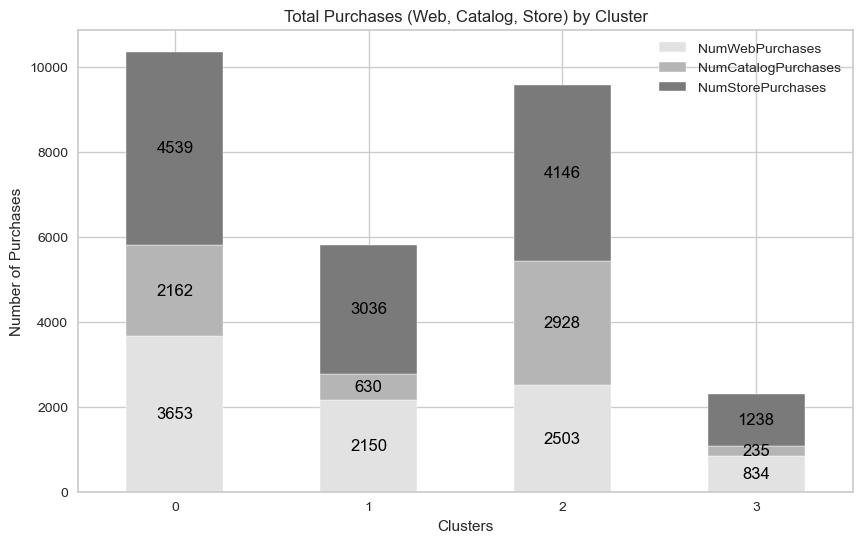

In [379]:
palette_g = sns.color_palette("Greys", n_colors=4)  # Set n_colors based on the number of categories

# Plotting a stacked bar plot
ax = data_grouped.plot(
    x="Clusters", 
    kind="bar", 
    stacked=True, 
    color=palette_g, 
    figsize=(10, 6)
)

# Set plot title and labels
ax.set_title("Total Purchases (Web, Catalog, Store) by Cluster")
ax.set_xlabel("Clusters")
ax.set_ylabel("Number of Purchases")

# Adding labels to each bar
for container in ax.containers:
    ax.bar_label(container, label_type="center", color="black", fontsize=12)
#rotate x ticks 90 degrees
plt.xticks(rotation=0)
# Save the plot
plt.savefig("plot.png", bbox_inches='tight', transparent=True)

# Show the plot
plt.show()

In [ ]:
palette_g = sns.color_palette("Greys", n_colors=4)  # Set n_colors based on the number of categories

# Plotting a stacked bar plot
ax = data_grouped.plot(
    x="Clusters", 
    kind="bar", 
    stacked=True, 
    color=palette_g, 
    figsize=(10, 6)
)

# Set plot title and labels
ax.set_title("Total Purchases (Web, Catalog, Store) by Cluster")
ax.set_xlabel("Clusters")
ax.set_ylabel("Number of Purchases")

# Adding labels to each bar
for container in ax.containers:
    ax.bar_label(container, label_type="center", color="black", fontsize=12)
#rotate x ticks 90 degrees
plt.xticks(rotation=0)
# Save the plot
plt.savefig("plot.png", bbox_inches='tight', transparent=True)

# Show the plot
plt.show()

##### 3.5.2.1. Promotion

+ Promotions: 'NumDealsPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response'

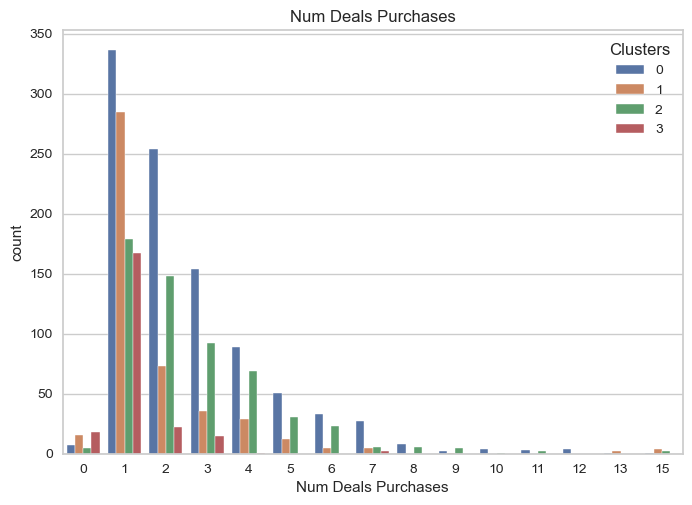

In [143]:
plt.figure()
pl = sns.countplot(x=data["NumDealsPurchases"], hue=data["Clusters"], palette= palette)
pl.set_title("Num Deals Purchases")
pl.set_xlabel("Num Deals Purchases")
plt.show()

<Figure size 800x550 with 0 Axes>

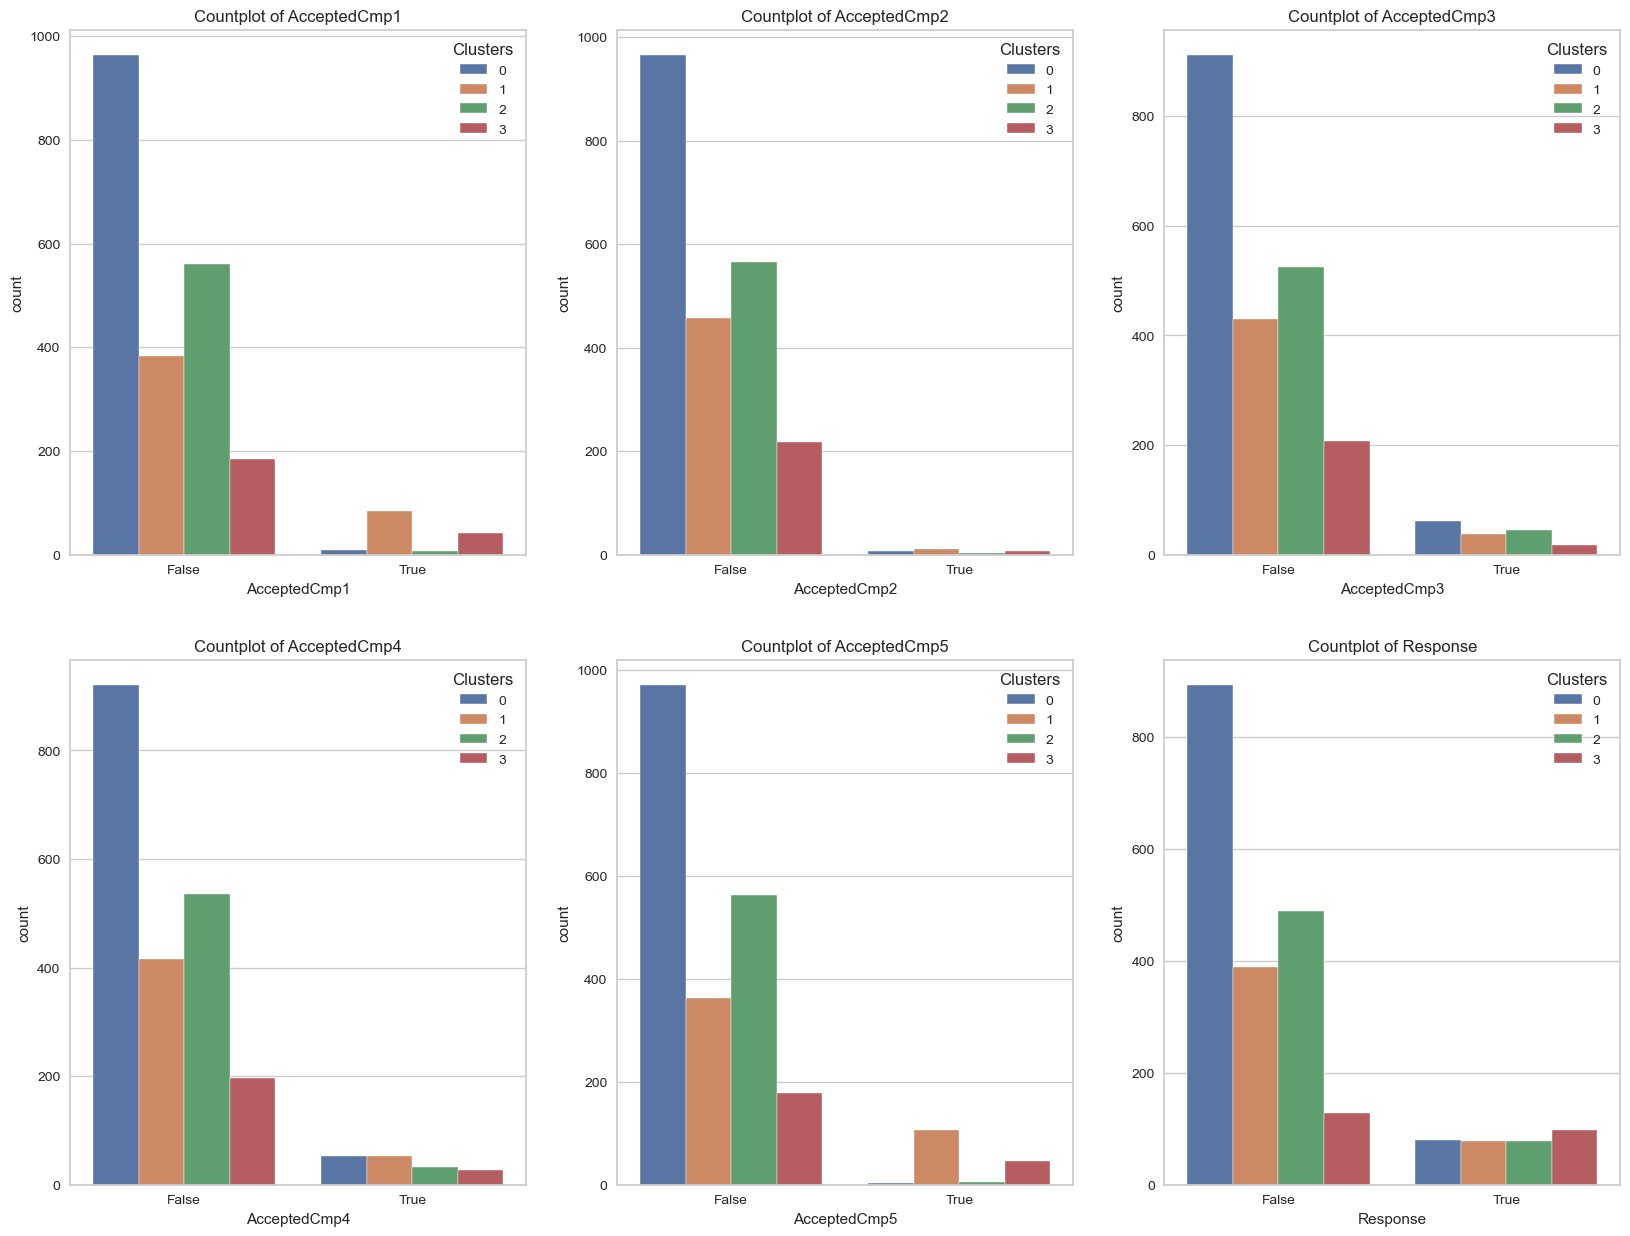

<Figure size 800x550 with 0 Axes>

In [144]:
cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]

fig, axes = plt.subplots(2, 3, figsize=(20, 15))
for i, col in enumerate(cols):
    sns.countplot(data=data, x=col, hue="Clusters", ax=axes[i//3, i%3], palette=palette)
    axes[i//3, i%3].set_title(f"Countplot of {col}")

plt.figure()

In [145]:
data[cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   AcceptedCmp1  2236 non-null   bool 
 1   AcceptedCmp2  2236 non-null   bool 
 2   AcceptedCmp3  2236 non-null   bool 
 3   AcceptedCmp4  2236 non-null   bool 
 4   AcceptedCmp5  2236 non-null   bool 
 5   Response      2236 non-null   bool 
dtypes: bool(6)
memory usage: 30.6 KB


In [229]:
#count number of unique values of ID
#data["ID"].nunique()

cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response", "ID"]
#change ID to String
data["ID"] = data["ID"].astype(str)
data[cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AcceptedCmp1  2236 non-null   bool  
 1   AcceptedCmp2  2236 non-null   bool  
 2   AcceptedCmp3  2236 non-null   bool  
 3   AcceptedCmp4  2236 non-null   bool  
 4   AcceptedCmp5  2236 non-null   bool  
 5   Response      2236 non-null   bool  
 6   ID            2236 non-null   object
dtypes: bool(6), object(1)
memory usage: 48.0+ KB


In [238]:
# 1 is true; 0 is false
cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
# sum the true values of each column for each cluster for each column
data_grouped = data.groupby("Clusters")[cols].sum()
data_grouped = data_grouped.reset_index()

data_grouped


,Clusters,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0,10,8,62,53,3,80
1,1,85,11,38,53,106,78
2,2,8,3,45,33,6,79
3,3,41,8,18,28,47,97


In [239]:
# count number of unique values of ID by Cluster
data_grouped["ID"] = data.groupby("Clusters")["ID"].nunique().values
data_grouped

,Clusters,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,ID
0,0,10,8,62,53,3,80,974
1,1,85,11,38,53,106,78,468
2,2,8,3,45,33,6,79,569
3,3,41,8,18,28,47,97,225


In [240]:
#data_grouped Percentage of accepted campaigns
#for each AcceptedCmp column, divide by the total number of ID
for col in cols:
    data_grouped[col] = data_grouped[col] / data_grouped["ID"] * 100

#drop ID column
data_grouped = data_grouped.drop("ID", axis=1)

data_grouped

,Clusters,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0,1.026694,0.821355,6.365503,5.441478,0.308008,8.213552
1,1,18.162393,2.350427,8.119658,11.324786,22.649573,16.666667
2,2,1.405975,0.527241,7.908612,5.799649,1.054482,13.884007
3,3,18.222222,3.555556,8.000000,12.444444,20.888889,43.111111


In [243]:
# Melt the data_grouped DataFrame
data_melted = data_grouped.melt(id_vars="Clusters", var_name="Promotion", value_name="Percentage Accepted")
data_melted

,Clusters,Promotion,Percentage Accepted
0,0,AcceptedCmp1,1.026694
1,1,AcceptedCmp1,18.162393
2,2,AcceptedCmp1,1.405975
3,3,AcceptedCmp1,18.222222
4,0,AcceptedCmp2,0.821355
5,1,AcceptedCmp2,2.350427
6,2,AcceptedCmp2,0.527241
7,3,AcceptedCmp2,3.555556
8,0,AcceptedCmp3,6.365503
9,1,AcceptedCmp3,8.119658


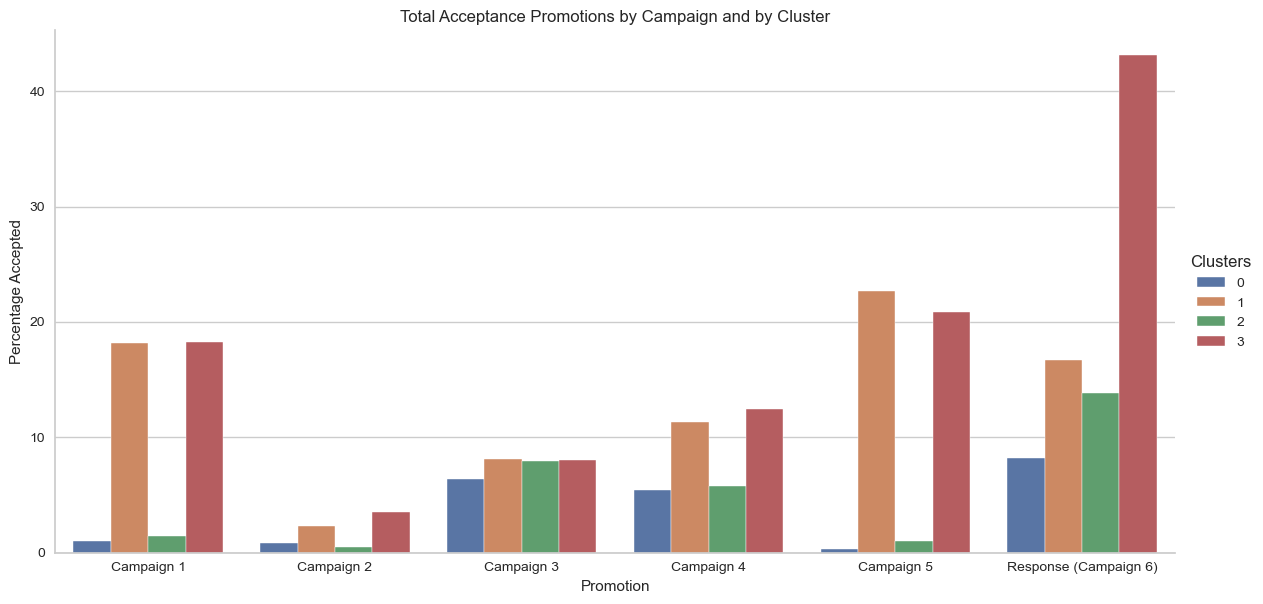

In [246]:
x_ticks = ["Campaign 1", "Campaign 2", "Campaign 3", "Campaign 4", "Campaign 5", "Response (Campaign 6)"]
# Plot the data
sns.catplot(data=data_melted, x="Promotion", y="Percentage Accepted", hue="Clusters", kind="bar", palette=palette, height=6, aspect=2)
plt.title("Total Acceptance Promotions by Campaign and by Cluster")

#change x ticks
plt.xticks(ticks=range(6), labels=x_ticks)

#save without background
plt.savefig("plot.png", bbox_inches='tight', transparent=True)
#show
plt.show()

+ Clusters 1 and 3 are the most engaged with the promotional campaigns, with Cluster 3 consistently showing the highest acceptance rates and overall response.
+ Clusters 0 and 2 display very low engagement across all campaigns, particularly in Cluster 0, which has the lowest promotion acceptance and response.
+ Campaign 2 showed poor performance across all clusters.
+ Campaigns 3 and 4 had similar average performance for all clusters, with moderate acceptance rates.
+ Campaign 6 (Response) performed well across all clusters, indicating a strong overall response.
+ Campaigns 1 and 5 were particularly effective for Clusters 1 and 3, demonstrating high acceptance rates in these groups.

##### 3.5.2.2. Price

+ Avergarage Ticket Price : Total Spent / Number of Purchases

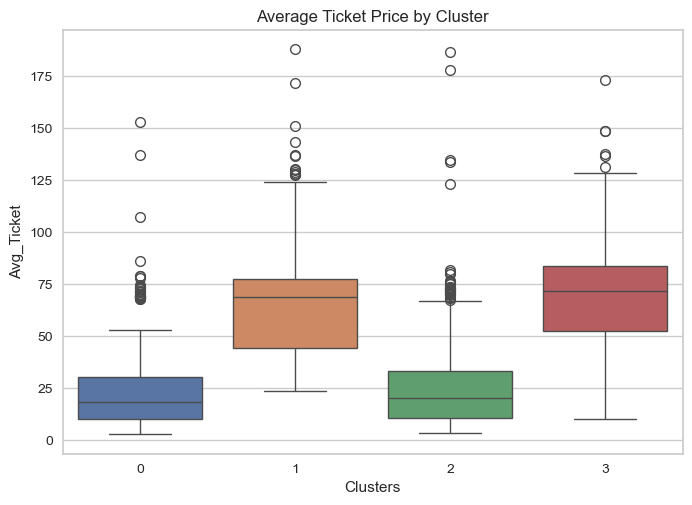

In [247]:
#Avergarage Ticket Price : Total Spent / Number of Purchases
data["Avg_Ticket"] = data["TotalSpent"] / data["TotalPurchases"]

plt.figure()
sns.boxplot(data=data[data["Avg_Ticket"]<1000], x="Clusters", y="Avg_Ticket", palette=palette)

#title
plt.title("Average Ticket Price by Cluster")

#save without background
plt.savefig("plot.png", bbox_inches='tight', transparent=True)
plt.show()

1.	Cluster 0 (Blue):
    + This cluster has the lowest median ticket price, around 25, with very limited spread.
    + Most customers in this group have an average ticket price between 10 and 40.
    + There are a few outliers above 75, indicating that some individuals spend more, but this is not common.

2.	Cluster 1 (Orange):
    + Cluster 1 has the highest median ticket price, at around 75.
    + The spread is also wide, with values ranging from 50 to 125, suggesting more variability in the spending behavior of this group.
    + Several outliers are observed, extending beyond 150, indicating a few individuals with very high average ticket prices

3.	Cluster 2 (Green):
    + Cluster 2 shows the lowest average ticket price distribution, with the median below 25.
    + The spread is quite narrow, indicating most customers in this group tend to spend around the same amount.
    + There are a few outliers, but the overall ticket prices in this cluster remain low.

4.	Cluster 3 (Red):
    + Cluster 3 has a relatively high median ticket price, close to 75, similar to Cluster 1.
    + The spread is moderate, with values ranging from 50 to 100, suggesting consistent spending behavior in this group.
    + Several outliers exist, but the overall distribution is more compact than in Cluster 1.

**Key Insights:**

+ Clusters 1 and 3 have the highest median ticket prices, with Cluster 1 displaying more variability and higher outliers, indicating that some individuals spend significantly more.
+ Clusters 0 and 2 exhibit lower spending behavior, with Cluster 0 having the lowest average ticket prices overall.
+ The outliers in Clusters 1 and 3 suggest that these groups contain a subset of customers who are willing to pay higher prices on average.

## 4. Conclusions

**Group #0**
+ Persona Main Attributes: Gen: X & Boomers // Ed. Level: Mostly Graduate & Post Graduate // Income: Lower-middle class 
+ Family Shape: Marital Status: With Partner // Kids: Mainly Yes (1-2) // Fam. Size: 3-5
+ Fidelity: No distinction
+ Product: Low Spending (<1K), Higher Spending in Gold Products, Present Outliers (less consistency)
+ Place: Less Purchases (3-7 /month) , High Store & Web Purchases, Web: Many Visits but low Purchase/Visit Rate
+ Promotion: Low Engage (Lowest), Higher Engage in Campaign Type 3, 4, and 6
+ Price: Lower Average Ticket Price ($15-$30)

**Group #1**
+ Persona Main Attributes: Gen: not conclusive // Ed. Level: Mostly Graduate & Post Graduate // Income: Middle Class  
+ Family Shape: Marital Status: With Partner // Kids: not conclusive (0-1) // Fam. Size: 2-3
+ Fidelity: No distinction
+ Product: High Spending (1K-2K), Higher Spending in Meat, Consistent Spending across all cat.
+ Place: Higher Purchases (15-25 /month) , High Store & Catalog, Web: Fewer Visits but high Purchase/Visit Rate
+ Promotion: Highly Engaged, Higher Engage in Campaign Type 1, 5, and 6
+ Price: Higher Average Ticket Price ($50-$90) & Preset Outliers (willigness to pay higher prices)


**Group #2**
+ Persona Main Attributes: Gen: X & Boomers // Ed. Level: Mostly Graduate & Post Graduate// Income: Lower-middle class   
+ Family Shape: Marital Status: Single // Kids: Mainly Yes (1-2) // Fam. Size: 2-3
+ Fidelity: No distinction
+ Product: Low Spending (<1K), Higher Spending in Gold Products, Present Outliers (less consistency)
+ Place: Less Purchases (3-7 /month), High Store & Web Purchases, Web: Many Visits but low Purchase/Visit Rate
+ Promotion: Low Engage, Higher Engage in Campaign Type 3, 4, and 6
+ Price: Lower Average Ticket Price ($15-$30)


**Group #3**
+ Persona Main Attributes: Gen: not conclusive // Ed. Level: Mostly Graduate & Post Graduate// Income: Middle & Upper Middle Class  
+ Family Shape: Marital Status: Single // Kids: Mainly No (0) // Fam. Size: 1
+ Fidelity: No distinction
+ Product: High Spending (1K-2K), Higher Spending in Meat
+ Place: Higher Purchases (15-25 /month) , Balance Distribution of Place, Web: Fewer Visits but high Purchase/Visit Rate
+ Promotion: Highly Engaged (Highest), Higher Engage in Campaign Type 1, 5, and 6
+ Price: Higher Average Ticket Price ($50-$90) & Preset Outliers (willigness to pay higher prices)
